# ***Solar Power Output Prediction System***

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
import sys
import sklearn

print("Python version: ", sys.version)
print("scikit-learn version: ", sklearn.__version__)


Python version:  3.12.1 (tags/v3.12.1:2305ca5, Dec  7 2023, 22:03:25) [MSC v.1937 64 bit (AMD64)]
scikit-learn version:  1.4.2


In [128]:
# pd.set_option('display.max_columns',None)

#### *Formating the Dataset*

In [129]:
df =  pd.read_csv("dataset.csv")

In [130]:
df.columns

Index(['Time', 'Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Cell Temperature',
       'Solar Insolation', 'Solar Power Output', 'Wind Speed',
       'Wind turbine Power Output', 'Wind turbine Operating Status',
       'Ambient Temperature', 'AC Primary Load', 'AC Primary Load Served',
       'Autosize Genset Power Output', 'Autosize Genset Operating Status',
       'Autosize Genset Fuel', 'Total Electrical Load Served',
       'Renewable Penetration', 'Excess Electrical Production',
       'Unmet Electrical Load', 'Total Renewable Power Output',
       'Inverter Power Input', 'Inverter Power Output',
       'Rectifier Power Input', 'Rectifier Power Output',
       'Battery Maximum Charge Power', 'Battery Maximum Discharge Power',
       'Battery Charge Power', 'Battery Discharge Power',
       'Battery Input Power', 'Battery Energy Content',
       'Battery State of Charge', 'Battery Energy Cost',
       'AC Required Operating Capacity', 

In [131]:
df["Time"]  = pd.to_datetime(df["Time"],format="mixed")

df[['Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Insolation',
       'Solar Power Output', 'Solar Cell Temperature', 'Wind Speed',
       'Wind turbine Power Output', 'Wind turbine Operating Status',
       'Ambient Temperature', 'AC Primary Load', 'AC Primary Load Served',
       'Autosize Genset Power Output', 'Autosize Genset Operating Status',
       'Autosize Genset Fuel', 'Total Electrical Load Served',
       'Renewable Penetration', 'Excess Electrical Production',
       'Unmet Electrical Load', 'Total Renewable Power Output',
       'Inverter Power Input', 'Inverter Power Output',
       'Rectifier Power Input', 'Rectifier Power Output',
       'Battery Maximum Charge Power', 'Battery Maximum Discharge Power',
       'Battery Charge Power', 'Battery Discharge Power',
       'Battery Input Power', 'Battery Energy Content',
       'Battery State of Charge', 'Battery Energy Cost',
       'AC Required Operating Capacity', 'DC Required Operating Capacity',
       'AC Operating Capacity', 'DC Operating Capacity']] = df[['Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Insolation',
       'Solar Power Output', 'Solar Cell Temperature', 'Wind Speed',
       'Wind turbine Power Output', 'Wind turbine Operating Status',
       'Ambient Temperature', 'AC Primary Load', 'AC Primary Load Served',
       'Autosize Genset Power Output', 'Autosize Genset Operating Status',
       'Autosize Genset Fuel', 'Total Electrical Load Served',
       'Renewable Penetration', 'Excess Electrical Production',
       'Unmet Electrical Load', 'Total Renewable Power Output',
       'Inverter Power Input', 'Inverter Power Output',
       'Rectifier Power Input', 'Rectifier Power Output',
       'Battery Maximum Charge Power', 'Battery Maximum Discharge Power',
       'Battery Charge Power', 'Battery Discharge Power',
       'Battery Input Power', 'Battery Energy Content',
       'Battery State of Charge', 'Battery Energy Cost',
       'AC Required Operating Capacity', 'DC Required Operating Capacity',
       'AC Operating Capacity', 'DC Operating Capacity']].apply(pd.to_numeric)

In [132]:
# df.to_csv("corrected_dataset.csv")

In [133]:
df.drop(['Wind Speed',
       'Wind turbine Power Output', 'Wind turbine Operating Status',
       'Ambient Temperature', 'AC Primary Load', 'AC Primary Load Served',
       'Autosize Genset Power Output', 'Autosize Genset Operating Status',
       'Autosize Genset Fuel', 'Total Electrical Load Served',
       'Renewable Penetration', 'Excess Electrical Production',
       'Unmet Electrical Load', 'Total Renewable Power Output',
       'Inverter Power Input', 'Inverter Power Output',
       'Rectifier Power Input', 'Rectifier Power Output',
       'Battery Maximum Charge Power', 'Battery Maximum Discharge Power',
       'Battery Charge Power', 'Battery Discharge Power',
       'Battery Input Power', 'Battery Energy Content',
       'Battery State of Charge', 'Battery Energy Cost',
       'AC Required Operating Capacity', 'DC Required Operating Capacity',
       'AC Operating Capacity', 'DC Operating Capacity'],axis=1,inplace=True)

In [134]:
df

Time  Global Solar  Solar Altitude  Solar Azimuth  \
0    2007-01-01 00:00:00           0.0             0.0       -6.78795   
1    2007-01-01 01:00:00           0.0             0.0      -45.35176   
2    2007-01-01 02:00:00           0.0             0.0      -60.21218   
3    2007-01-01 03:00:00           0.0             0.0      -65.94936   
4    2007-01-01 04:00:00           0.0             0.0      -68.03603   
...                  ...           ...             ...            ...   
8755 2007-12-31 19:00:00           0.0             0.0       68.21178   
8756 2007-12-31 20:00:00           0.0             0.0       67.63509   
8757 2007-12-31 21:00:00           0.0             0.0       64.81570   
8758 2007-12-31 22:00:00           0.0             0.0       57.46185   
8759 2007-12-31 23:00:00           0.0             0.0       38.08067   

      Solar Angle of Incidence  Solar Cell Temperature  Solar Insolation  \
0                         90.0                25.63279               0.0   
1                         90.0                25.63279               0.0   
2                         90.0                25.63279               0.0   
3                         90.0                25.63279               0.0   
4                         90.0                25.63279               0.0   
...                        ...                     ...               ...   
8755                      90.0                25.52278               0.0   
8756                      90.0                25.52278               0.0   
8757                      90.0                25.52278               0.0   
8758                      90.0                25.52278               0.0   
8759                      90.0                25.52278               0.0   

      Solar Power Output  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  
...                  ...  
8755                 0.0  
8756                 0.0  
8757                 0.0  
8758                 0.0  
8759                 0.0  

[8760 rows x 8 columns]

In [135]:
df.columns

Index(['Time', 'Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Cell Temperature',
       'Solar Insolation', 'Solar Power Output'],
      dtype='object')

#### *Correlation between Features*

Text(0.5, 1.0, 'Correlation Heatmap')

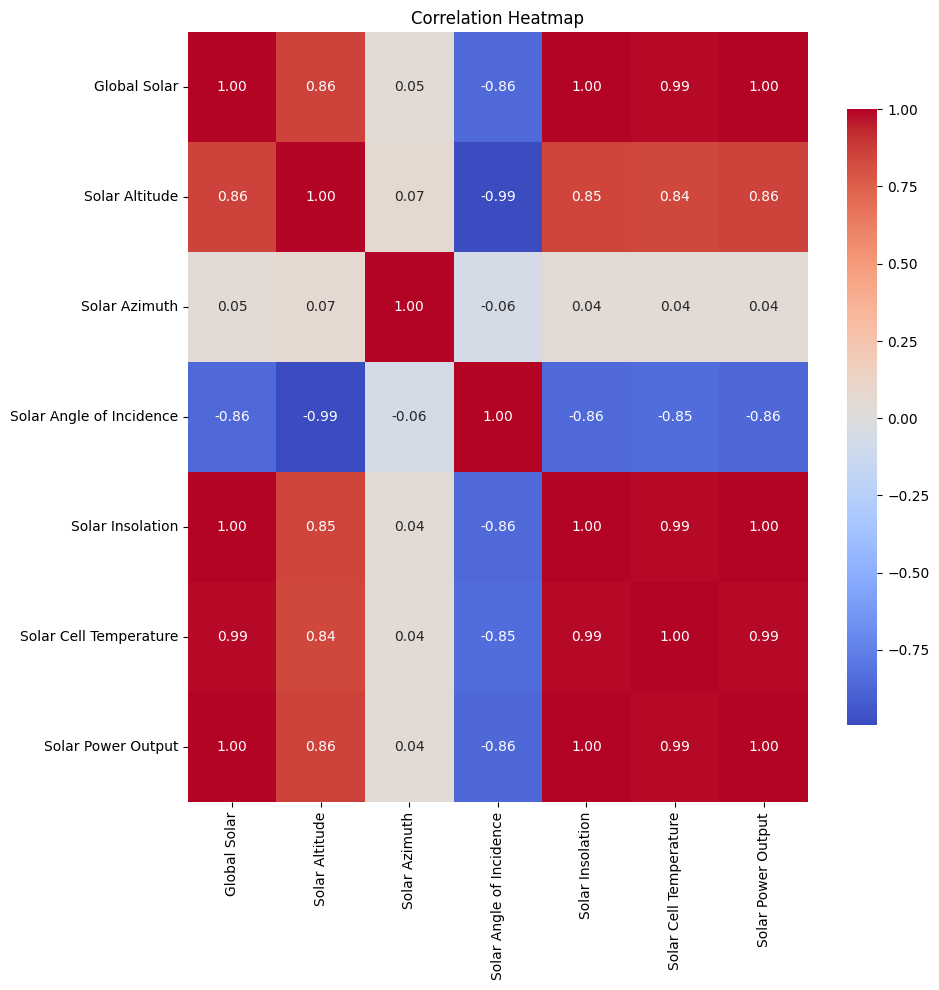

In [136]:
columns = ['Global Solar', 'Solar Altitude', 'Solar Azimuth',
           'Solar Angle of Incidence', 'Solar Insolation',
           'Solar Cell Temperature', 'Solar Power Output']
corr = df[columns].corr()
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f",ax = ax,cbar_kws={"shrink":.8})
ax.set_title("Correlation Heatmap")

#### *Dataset Features Information*

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Time                      8760 non-null   datetime64[ns]
 1   Global Solar              8760 non-null   float64       
 2   Solar Altitude            8760 non-null   float64       
 3   Solar Azimuth             8760 non-null   float64       
 4   Solar Angle of Incidence  8760 non-null   float64       
 5   Solar Cell Temperature    8760 non-null   float64       
 6   Solar Insolation          8760 non-null   float64       
 7   Solar Power Output        8760 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 547.6 KB


#### *Checking Zero Values* 

In [138]:
for column in columns:
    print(column, ": ", (df[column]==0).sum())


Global Solar :  4074
Solar Altitude :  4386
Solar Azimuth :  0
Solar Angle of Incidence :  0
Solar Insolation :  4386
Solar Cell Temperature :  0
Solar Power Output :  4386


In [139]:
df

Time  Global Solar  Solar Altitude  Solar Azimuth  \
0    2007-01-01 00:00:00           0.0             0.0       -6.78795   
1    2007-01-01 01:00:00           0.0             0.0      -45.35176   
2    2007-01-01 02:00:00           0.0             0.0      -60.21218   
3    2007-01-01 03:00:00           0.0             0.0      -65.94936   
4    2007-01-01 04:00:00           0.0             0.0      -68.03603   
...                  ...           ...             ...            ...   
8755 2007-12-31 19:00:00           0.0             0.0       68.21178   
8756 2007-12-31 20:00:00           0.0             0.0       67.63509   
8757 2007-12-31 21:00:00           0.0             0.0       64.81570   
8758 2007-12-31 22:00:00           0.0             0.0       57.46185   
8759 2007-12-31 23:00:00           0.0             0.0       38.08067   

      Solar Angle of Incidence  Solar Cell Temperature  Solar Insolation  \
0                         90.0                25.63279               0.0   
1                         90.0                25.63279               0.0   
2                         90.0                25.63279               0.0   
3                         90.0                25.63279               0.0   
4                         90.0                25.63279               0.0   
...                        ...                     ...               ...   
8755                      90.0                25.52278               0.0   
8756                      90.0                25.52278               0.0   
8757                      90.0                25.52278               0.0   
8758                      90.0                25.52278               0.0   
8759                      90.0                25.52278               0.0   

      Solar Power Output  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  
...                  ...  
8755                 0.0  
8756                 0.0  
8757                 0.0  
8758                 0.0  
8759                 0.0  

[8760 rows x 8 columns]

#### *Exploratory Data Analysis* 

In [140]:
colors = ["skyblue","salmon","green","purple", "orange","red"]
features = ['Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Cell Temperature',
       'Solar Insolation']

#### *Histogram*

In [141]:
def plot_histplot(df,colors,features):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))
    fig.suptitle("Distribution Plots for Features")

    # Flatten the axes array
    axes = axes.flatten()
    
    # Plot histograms and density plots
    for i, feature in enumerate(features ): 
        color = colors[i % len(colors)]  # Cycle through colors
        sns.histplot(df[feature], kde=True, ax=axes[i], color=color)
        axes[i].set_title(f"{feature} Distribution")

    # Remove unused subplots
    if len(features) < len(axes):
        for j in range(len(features), len(axes)):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [142]:
plot_histplot(df,colors,features)

### *Line plot over year*

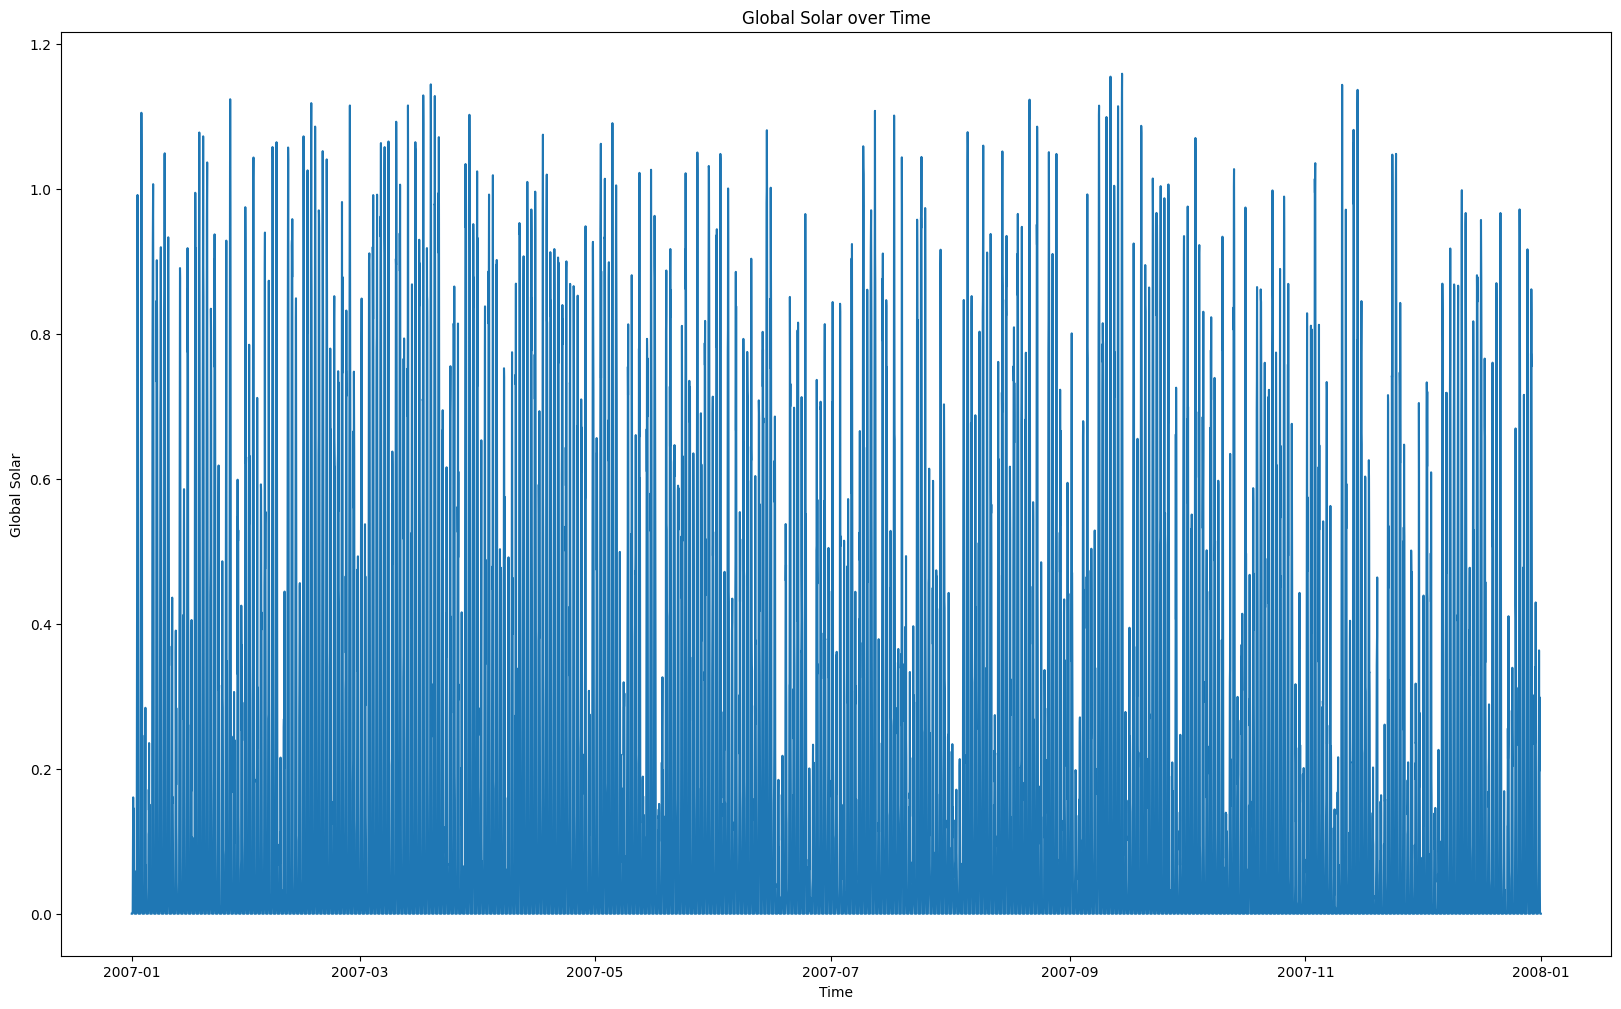

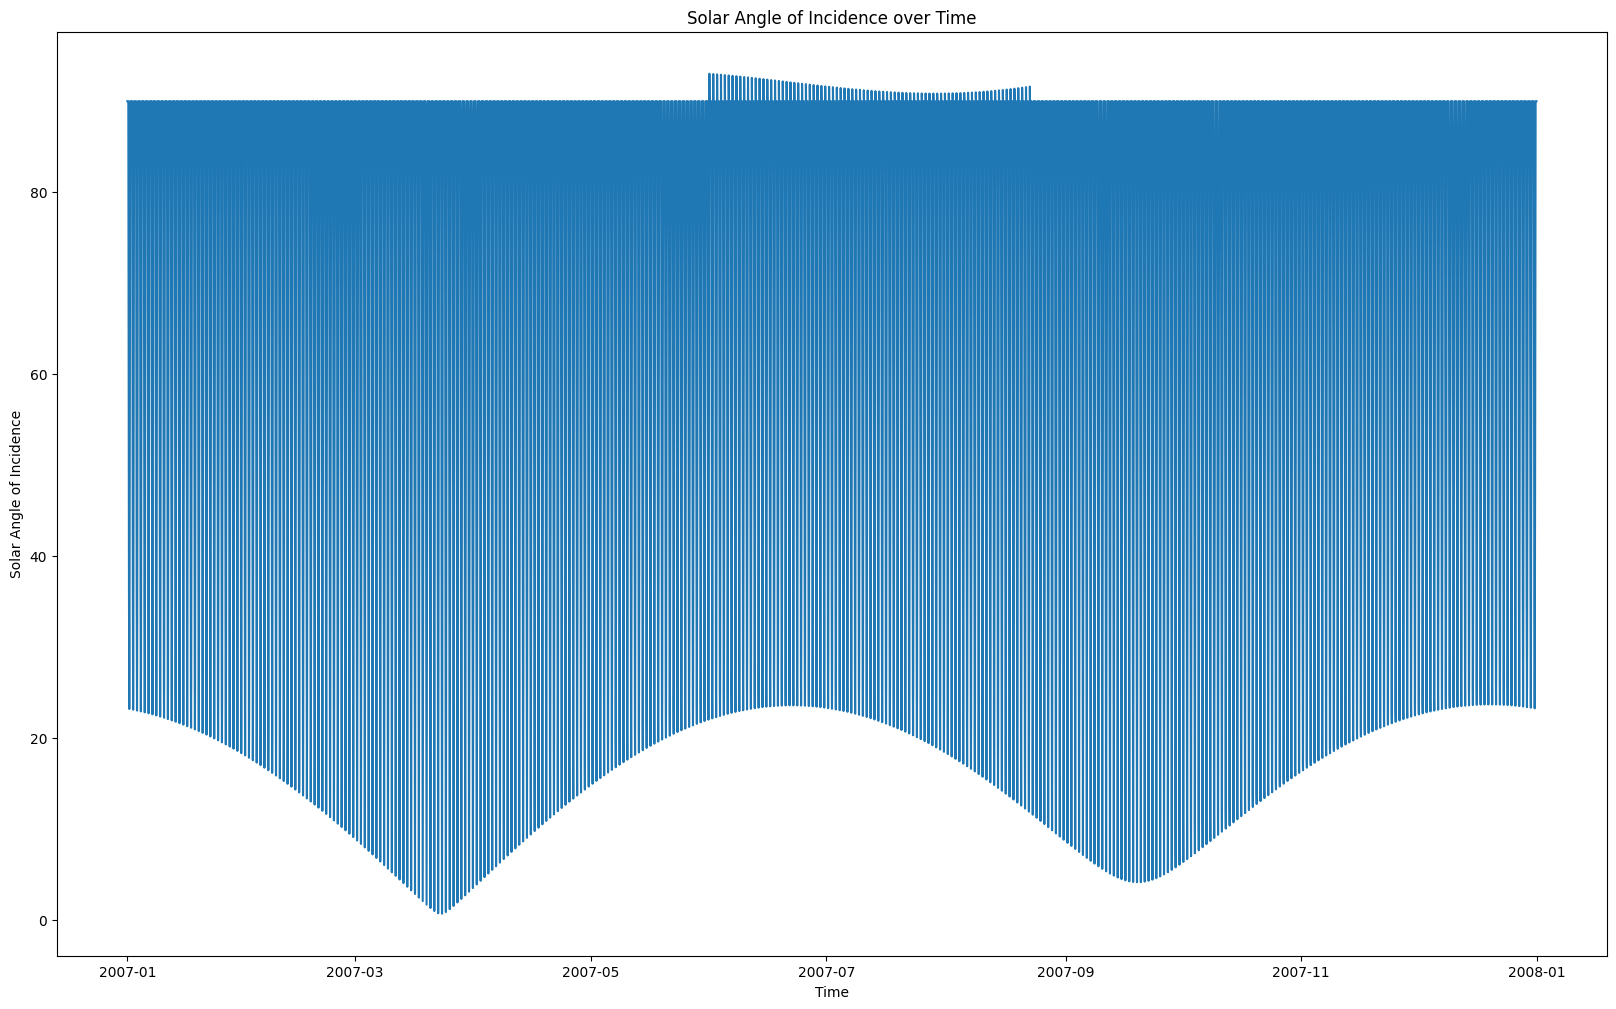

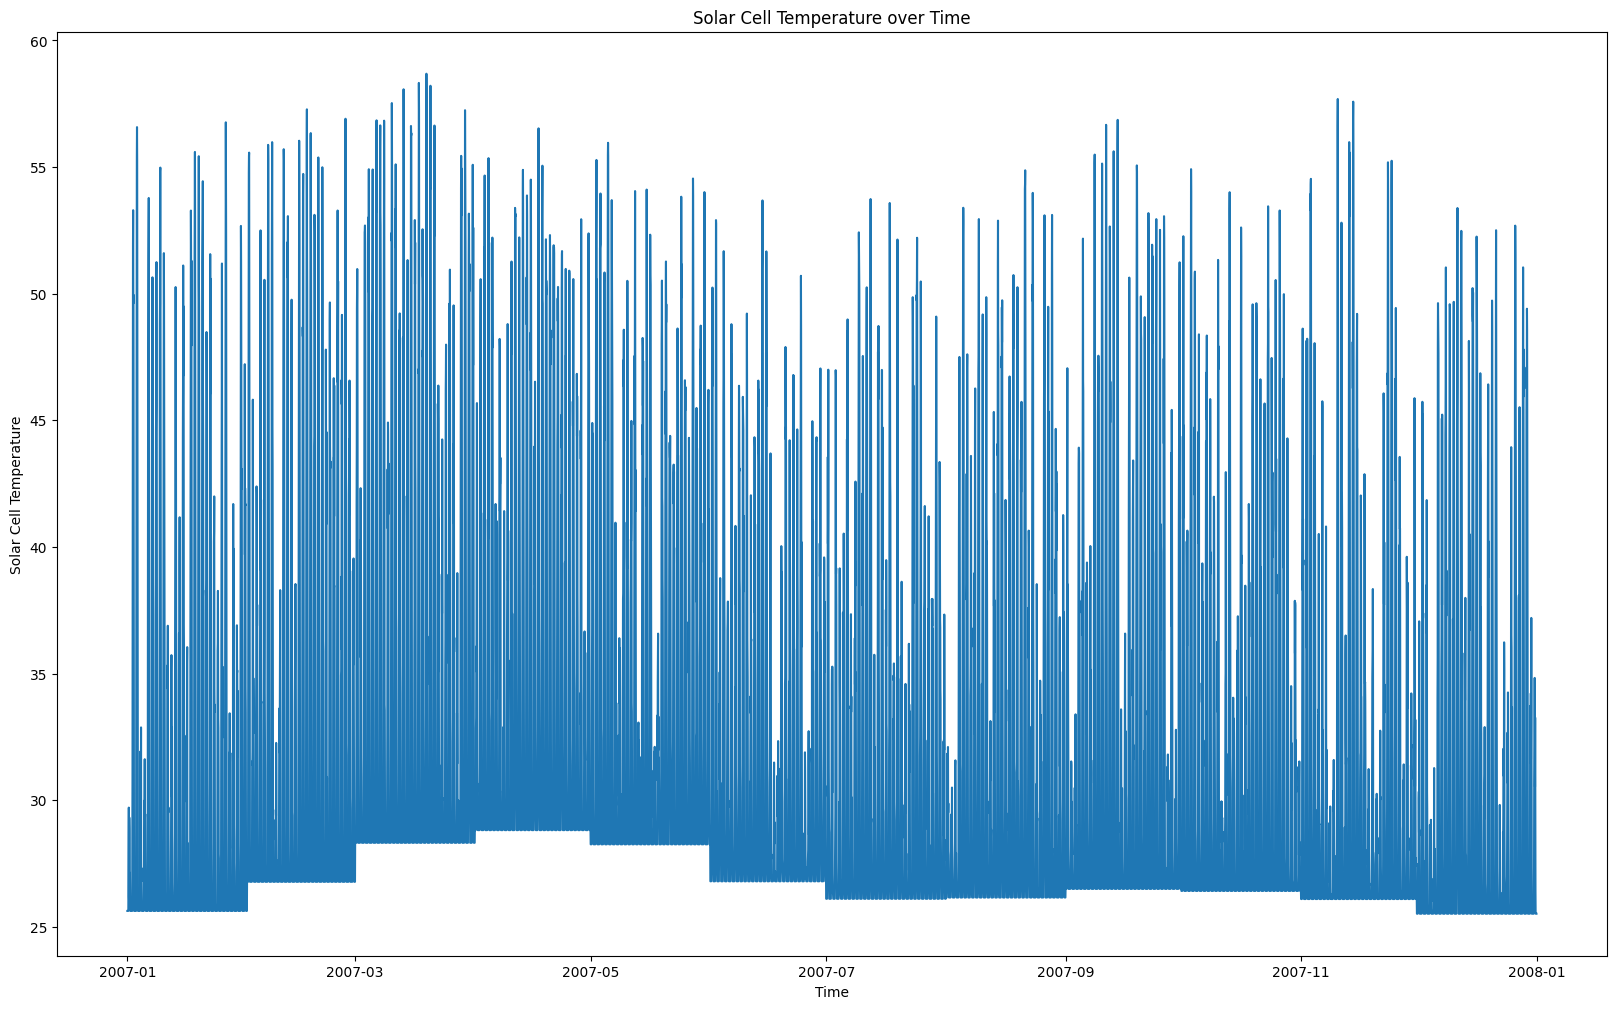

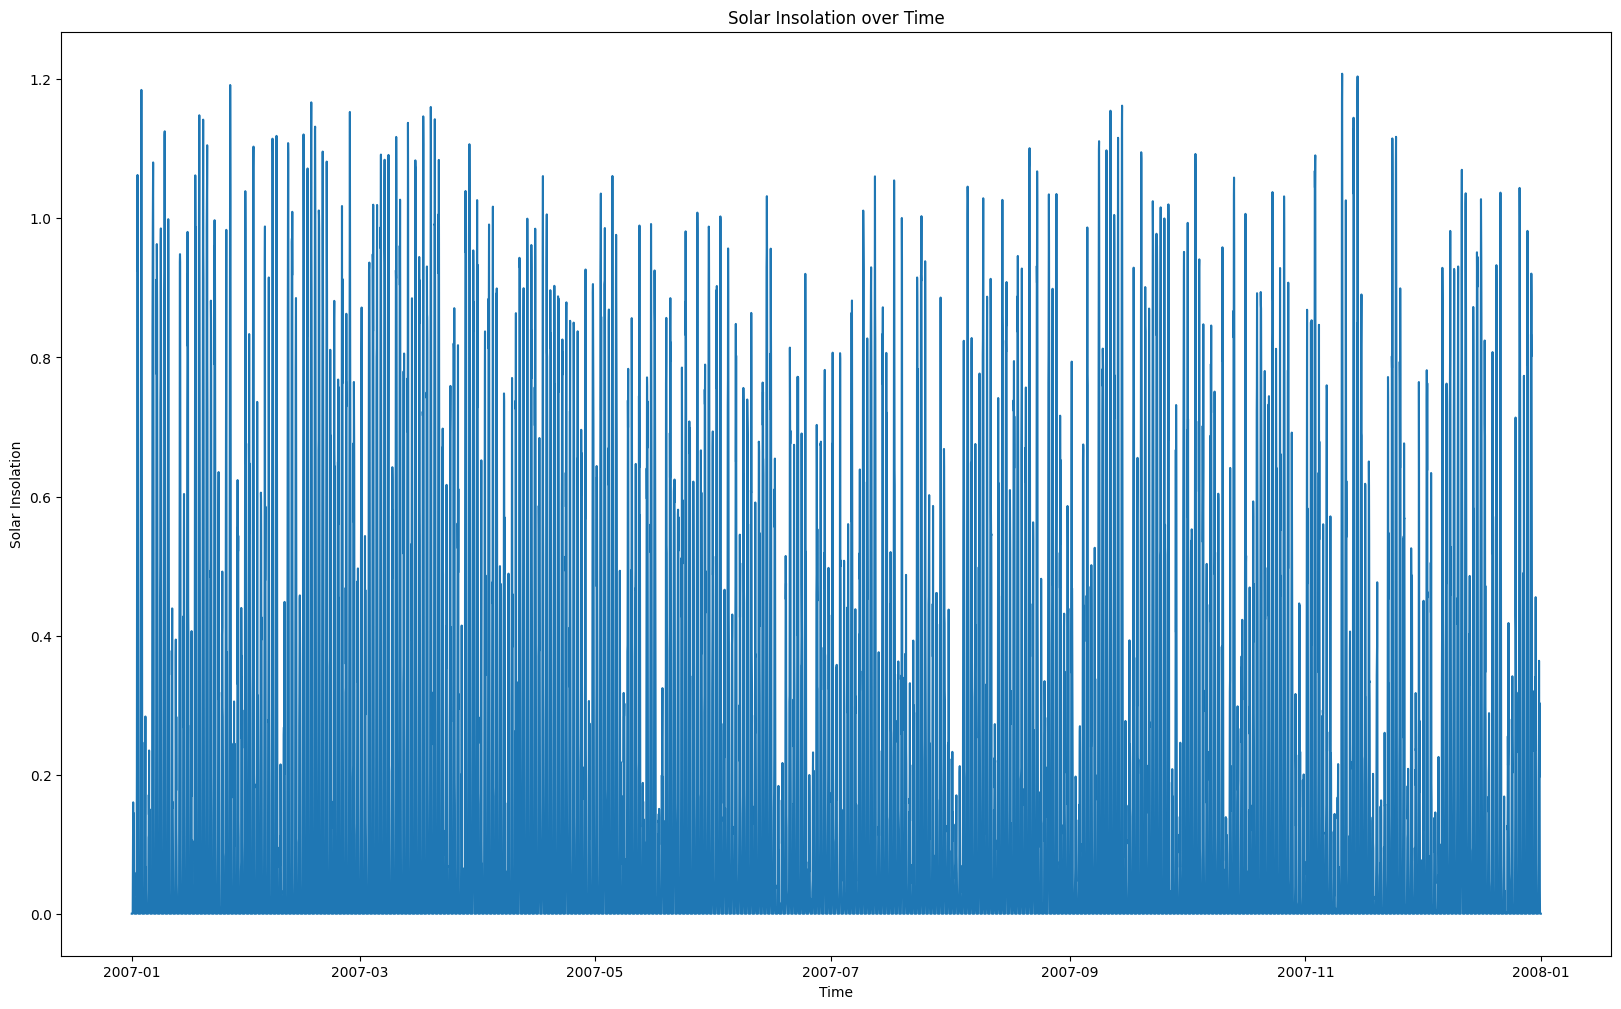

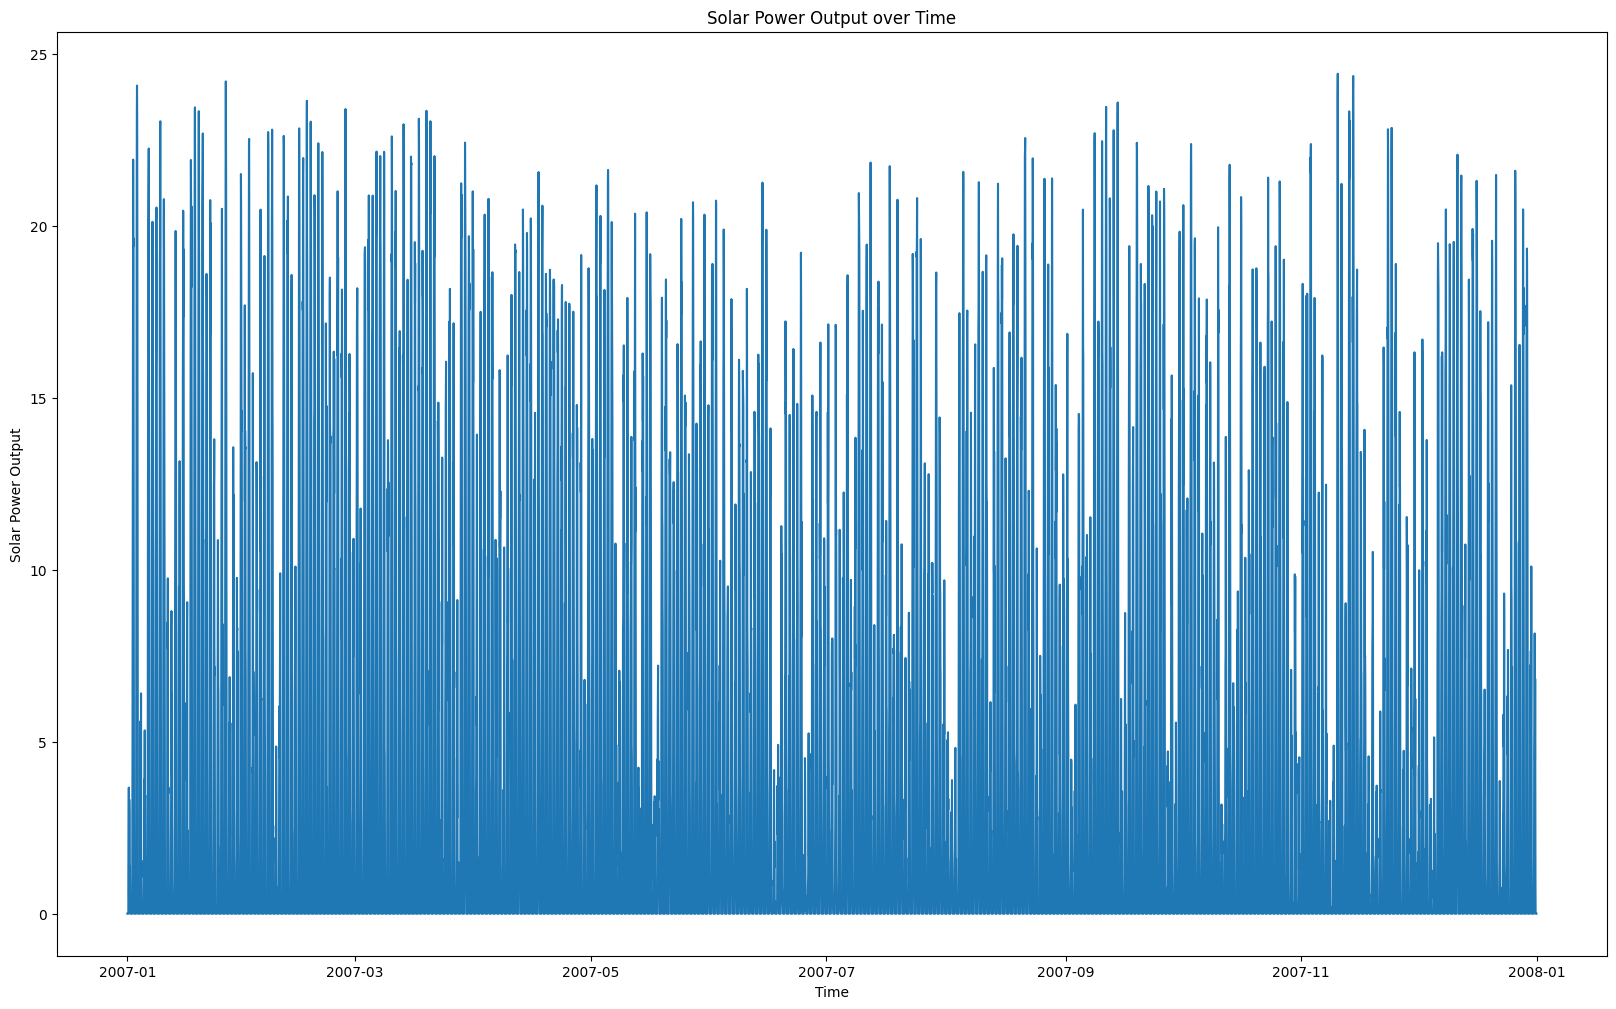

In [143]:
features = ['Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Cell Temperature',
       'Solar Insolation','Solar Power Output']
for feature in features:
    plt.figure(figsize=(20, 12))
    sns.lineplot(x="Time", y=feature, data=df)
    plt.title(f'{feature} over Time')
    plt.show()

#### *Line plot over day*

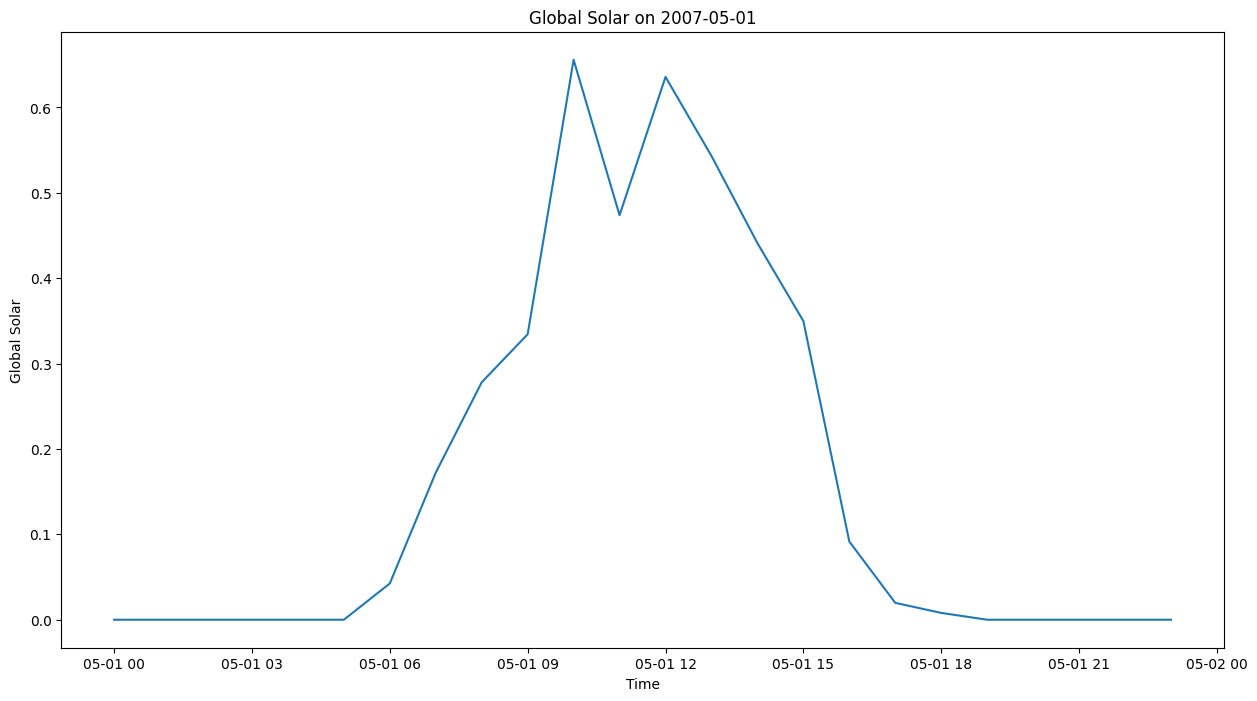

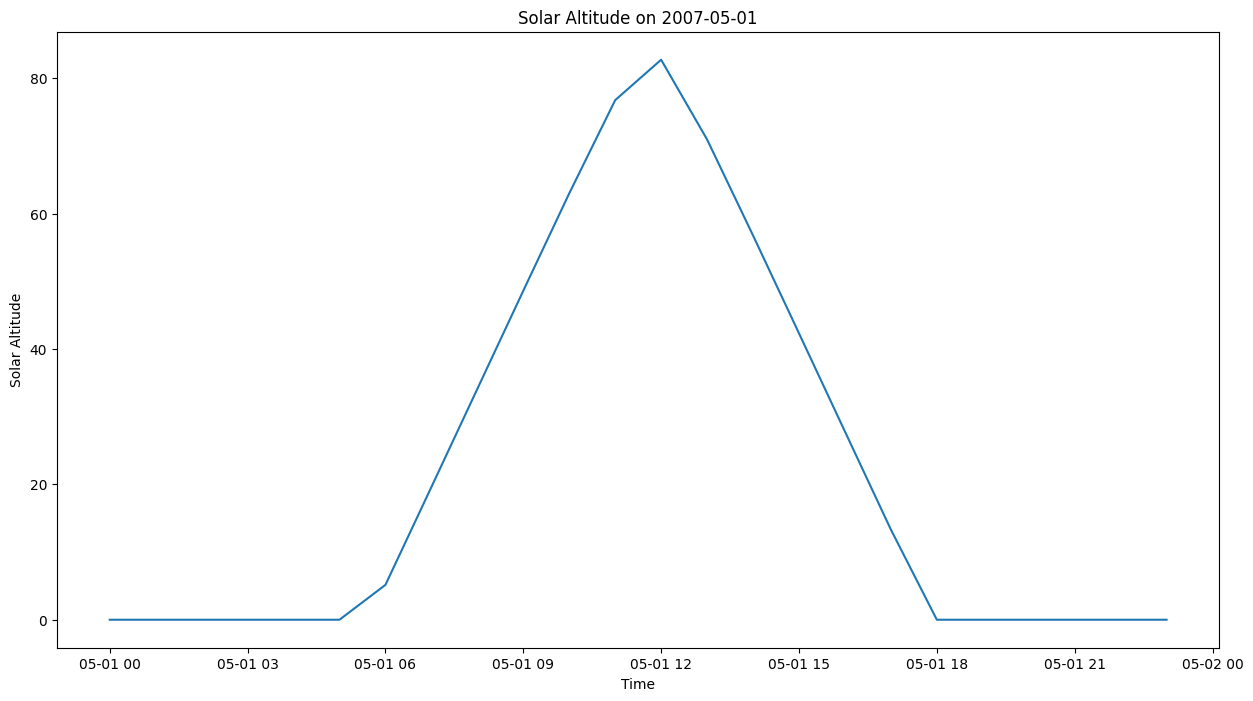

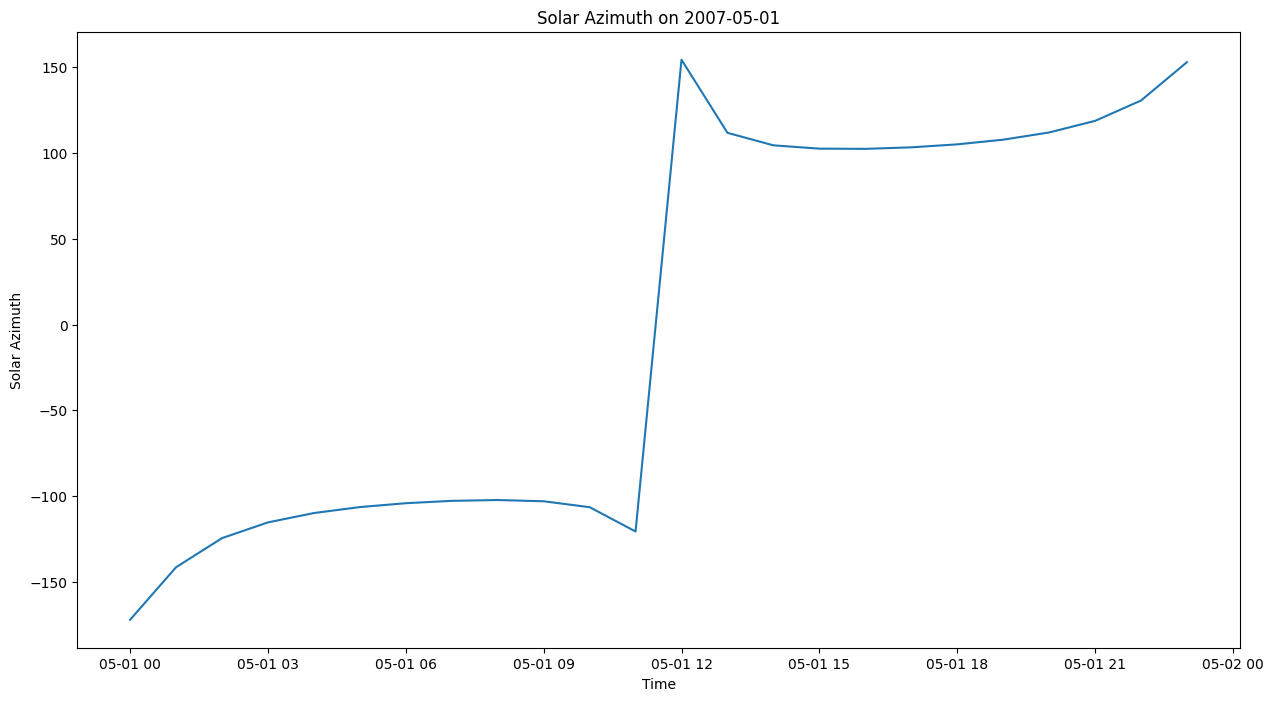

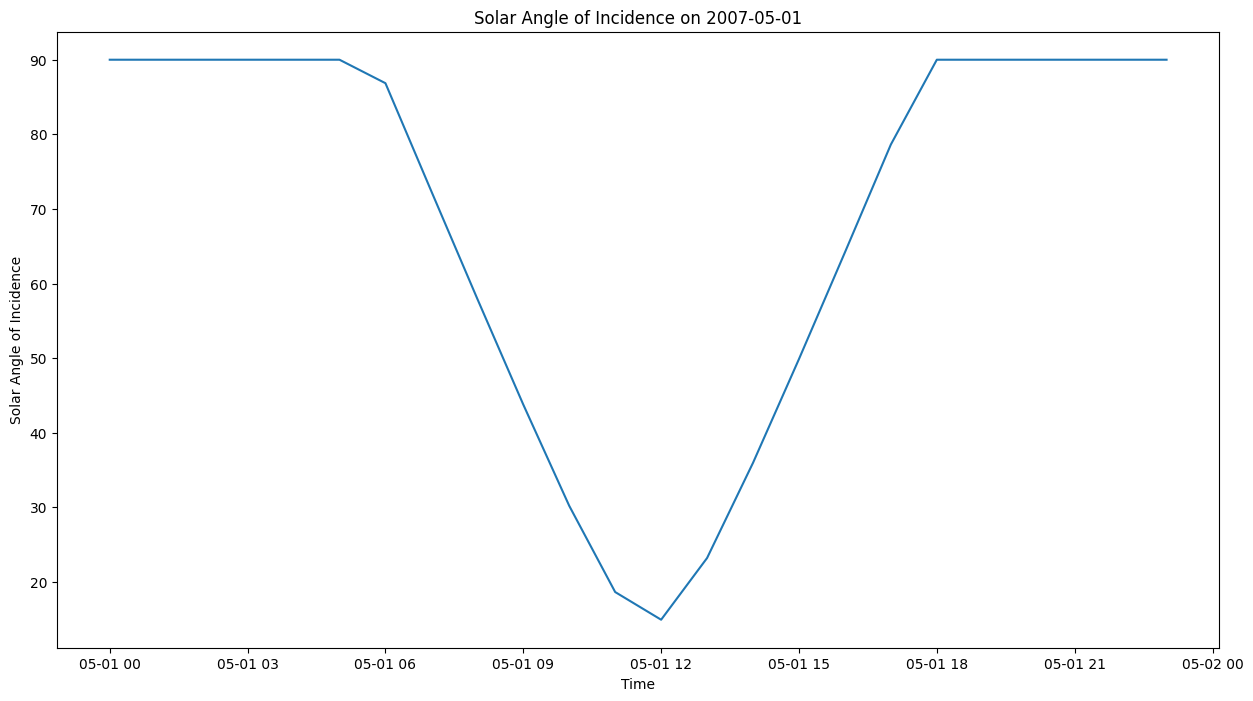

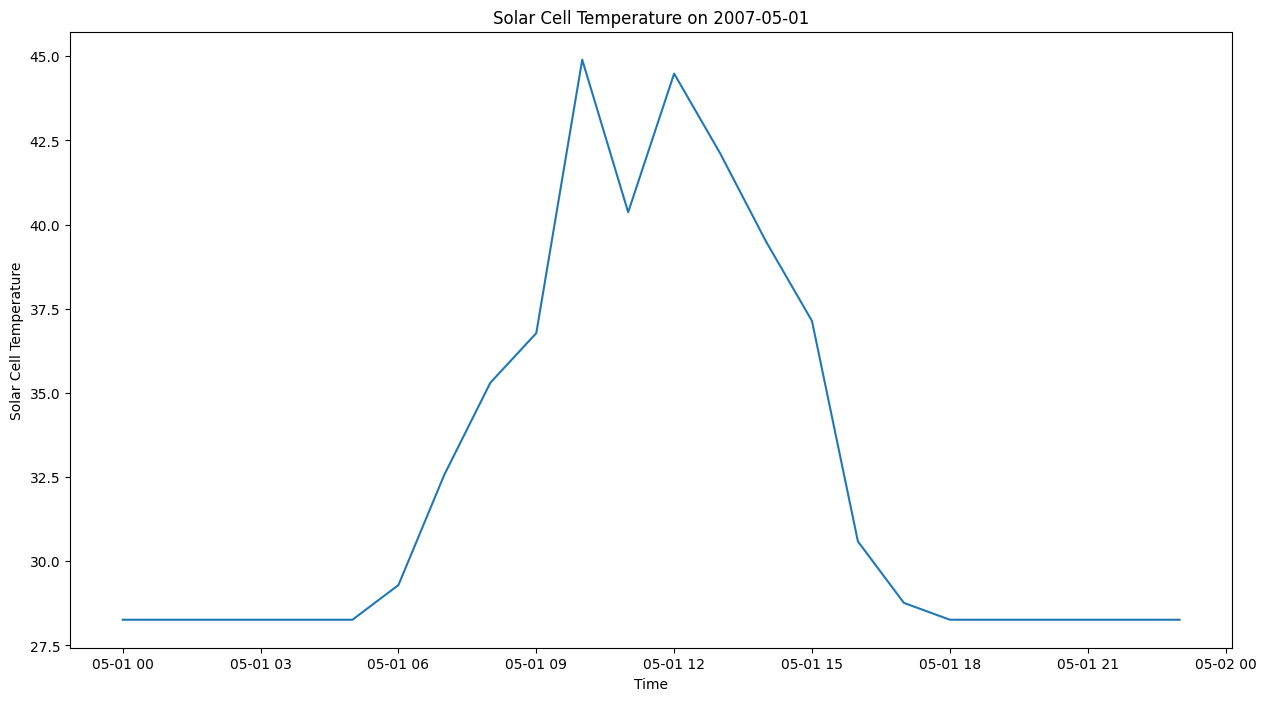

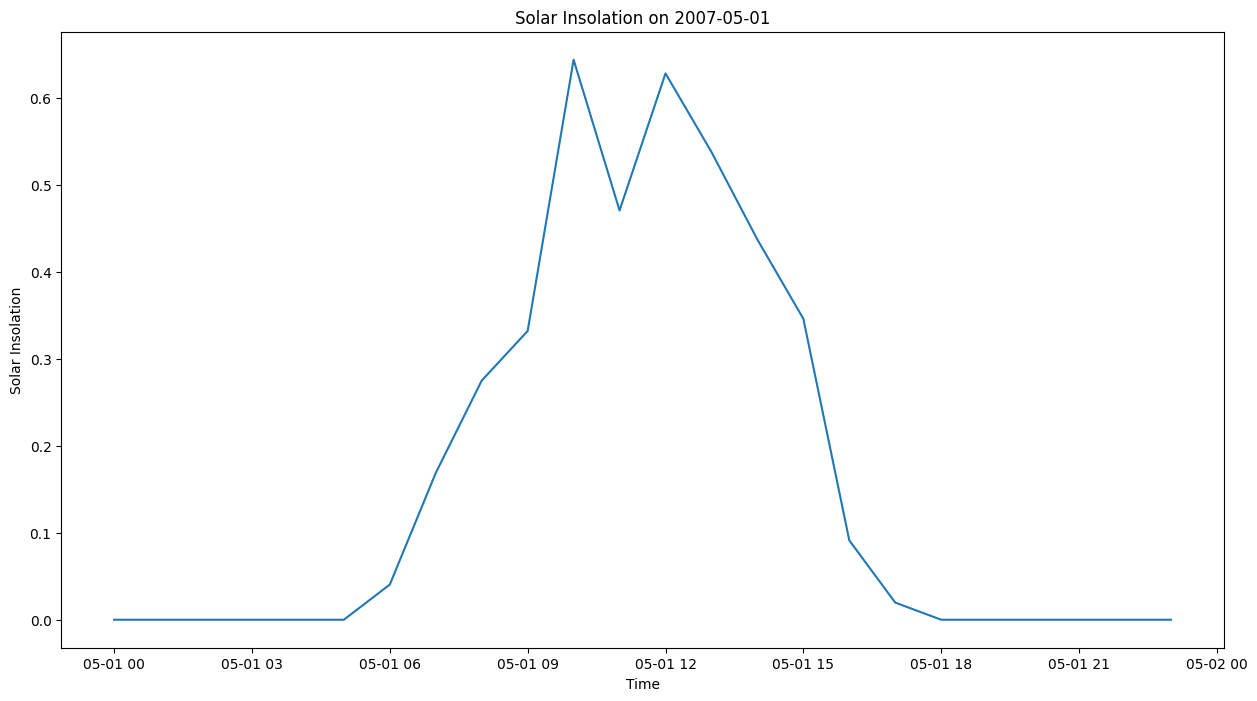

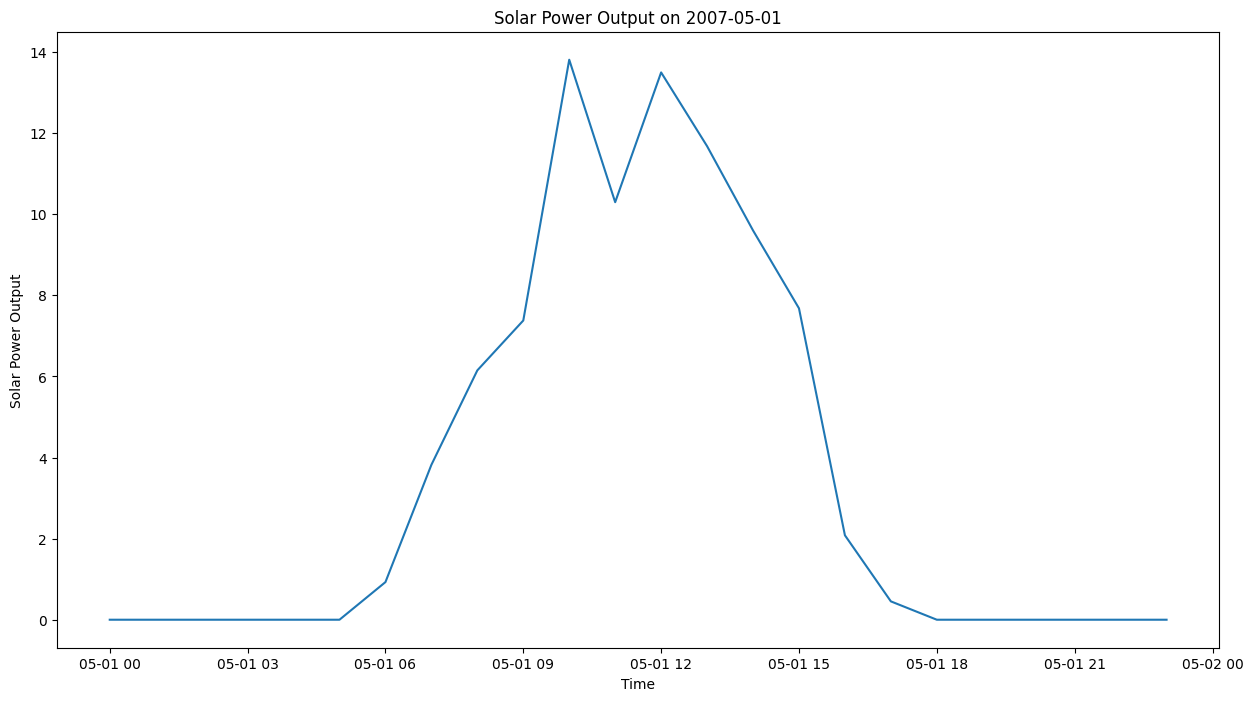

In [144]:
# Assuming 'Time' is your time column and is in datetime format
day_to_plot = '2007-05-01'  # Change this to the day you want to plot

# Filter the DataFrame to include only the specified day
df_day = df[df['Time'].dt.strftime('%Y-%m-%d') == day_to_plot]

features = ['Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Cell Temperature',
       'Solar Insolation','Solar Power Output']

for feature in features:
    plt.figure(figsize=(15, 8))
    sns.lineplot(x="Time", y=feature, data=df_day)
    plt.title(f'{feature} on {day_to_plot}')
    plt.show()


#### *Scatter plot over a Year*

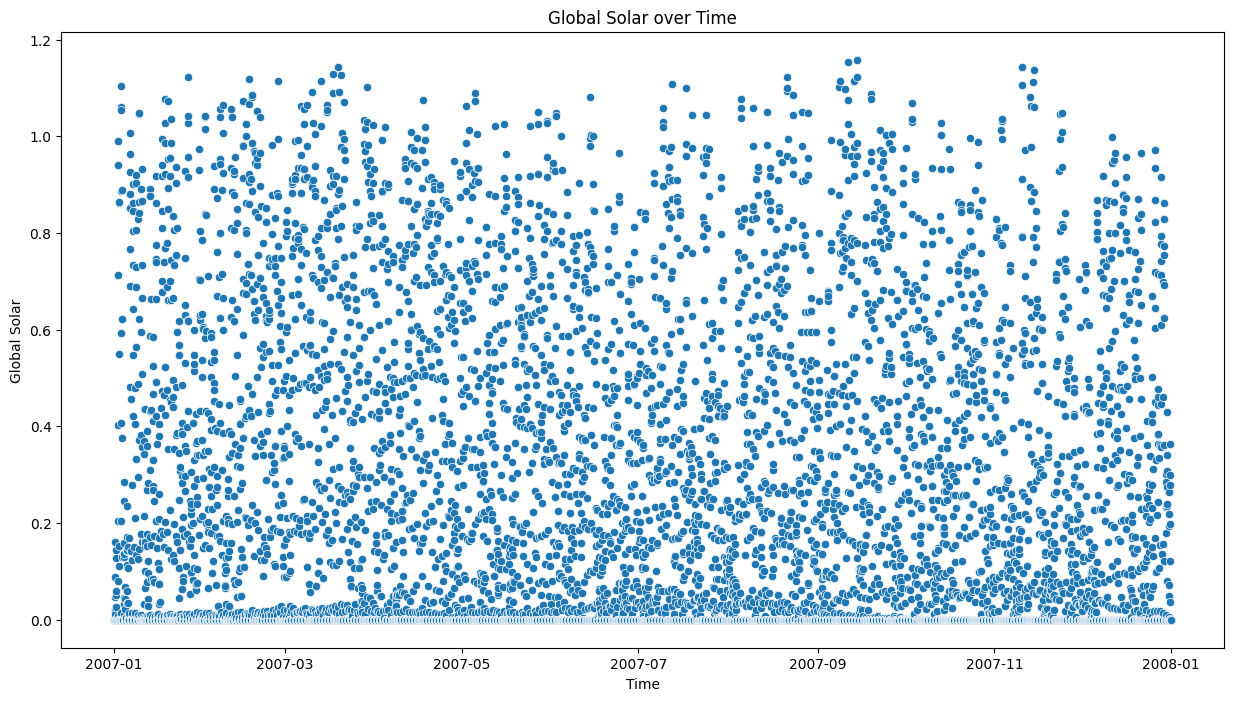

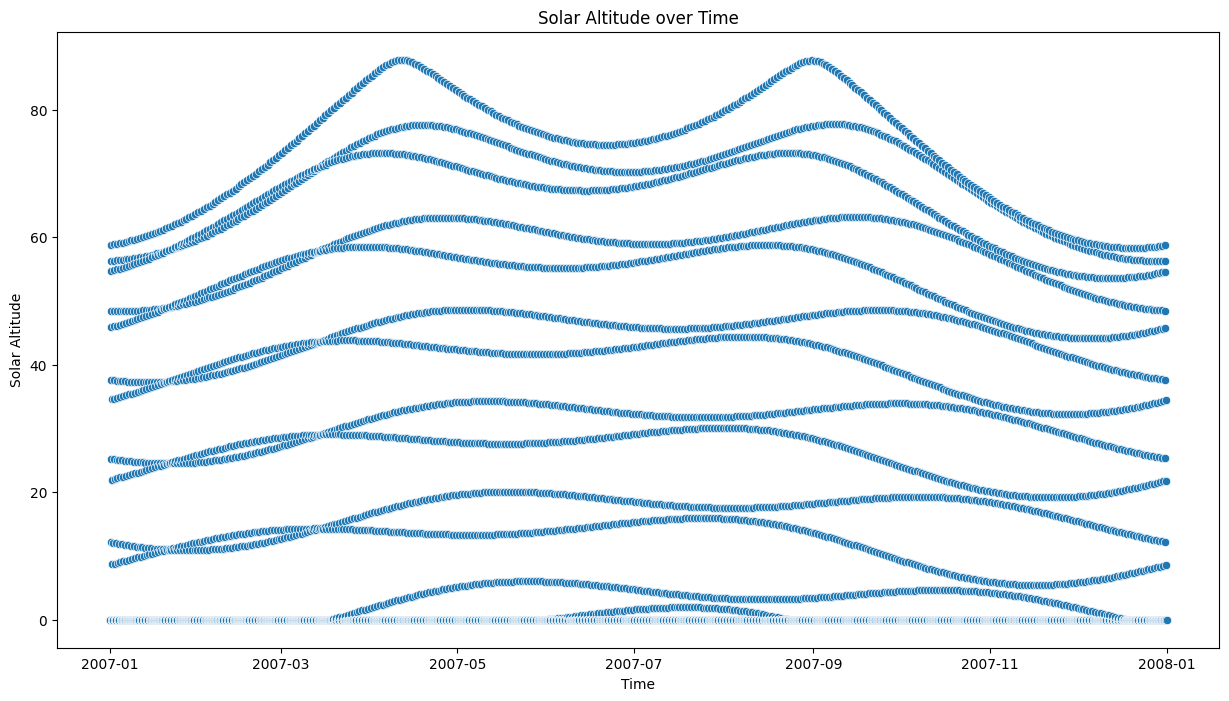

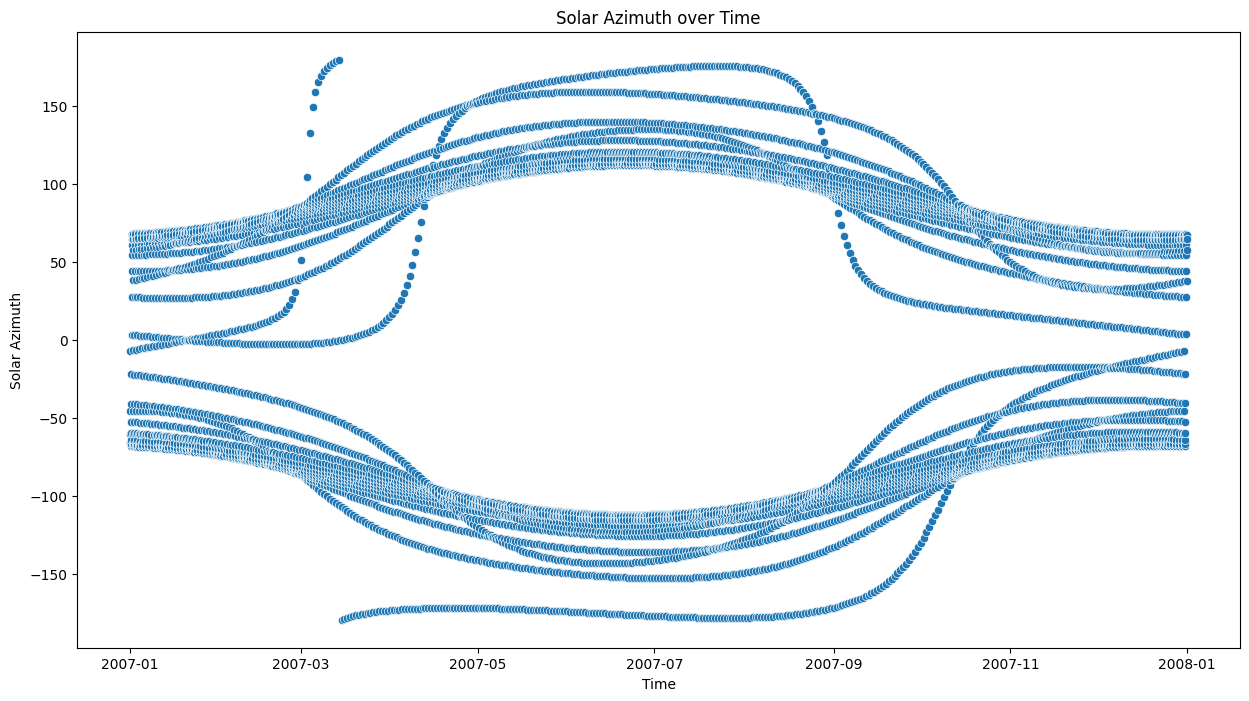

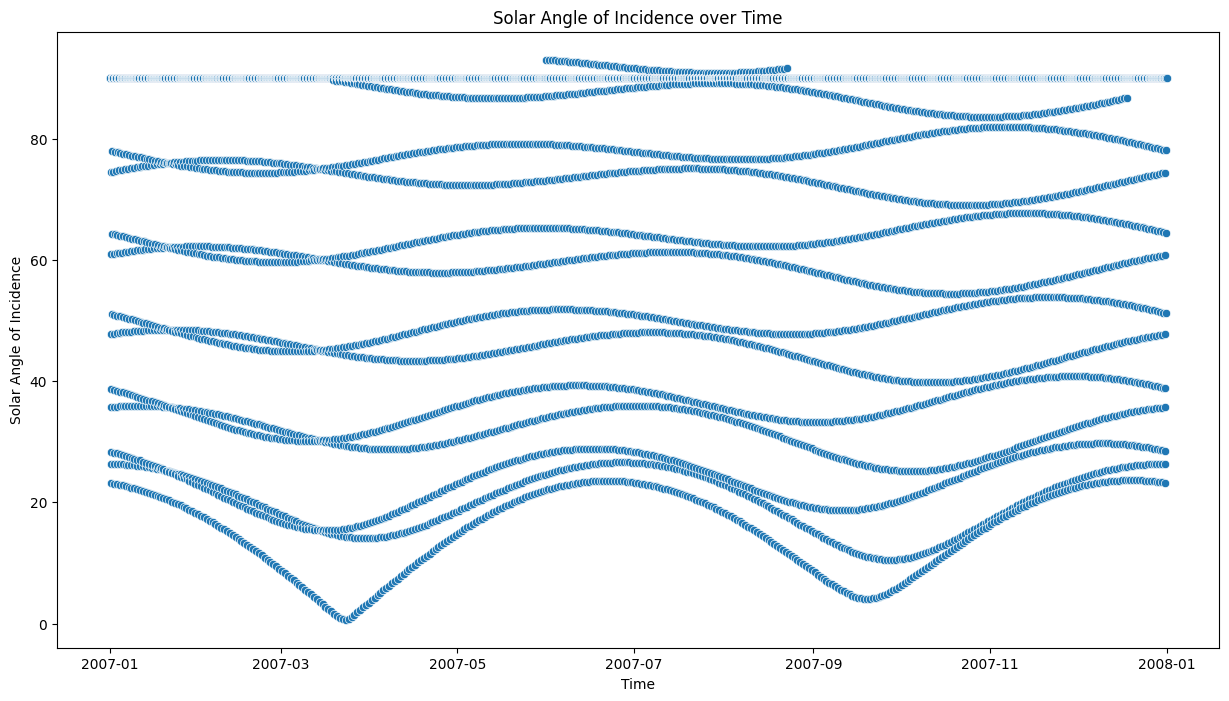

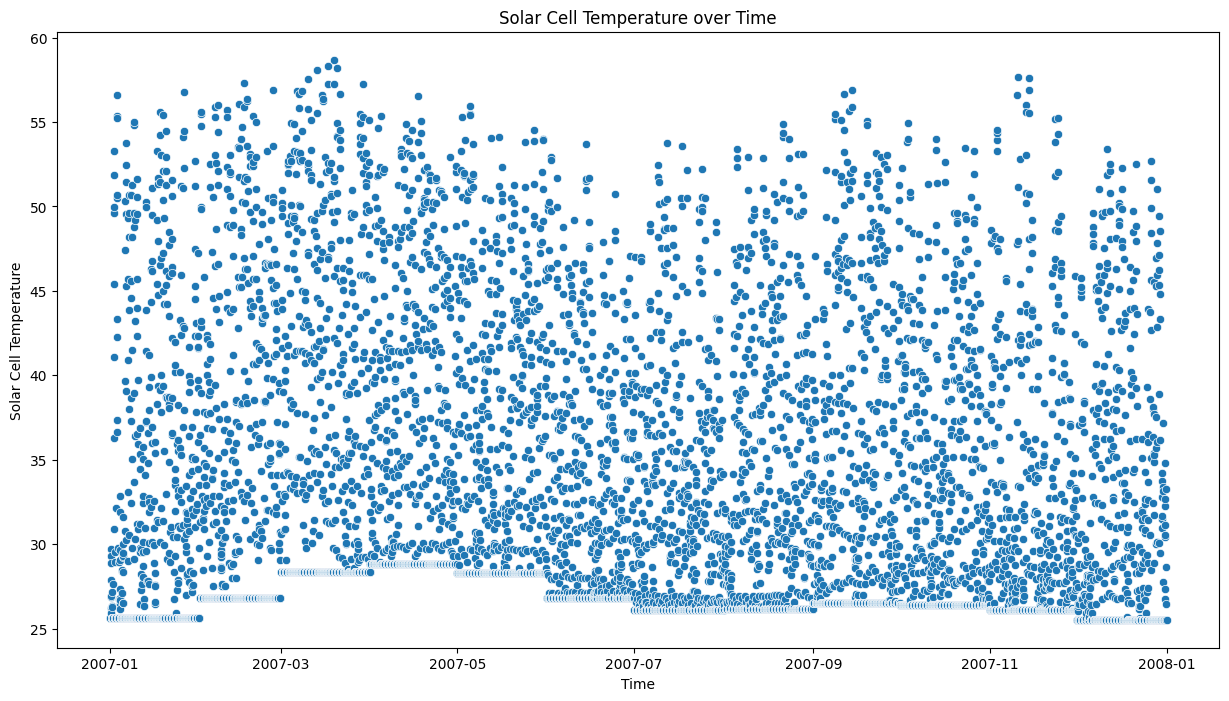

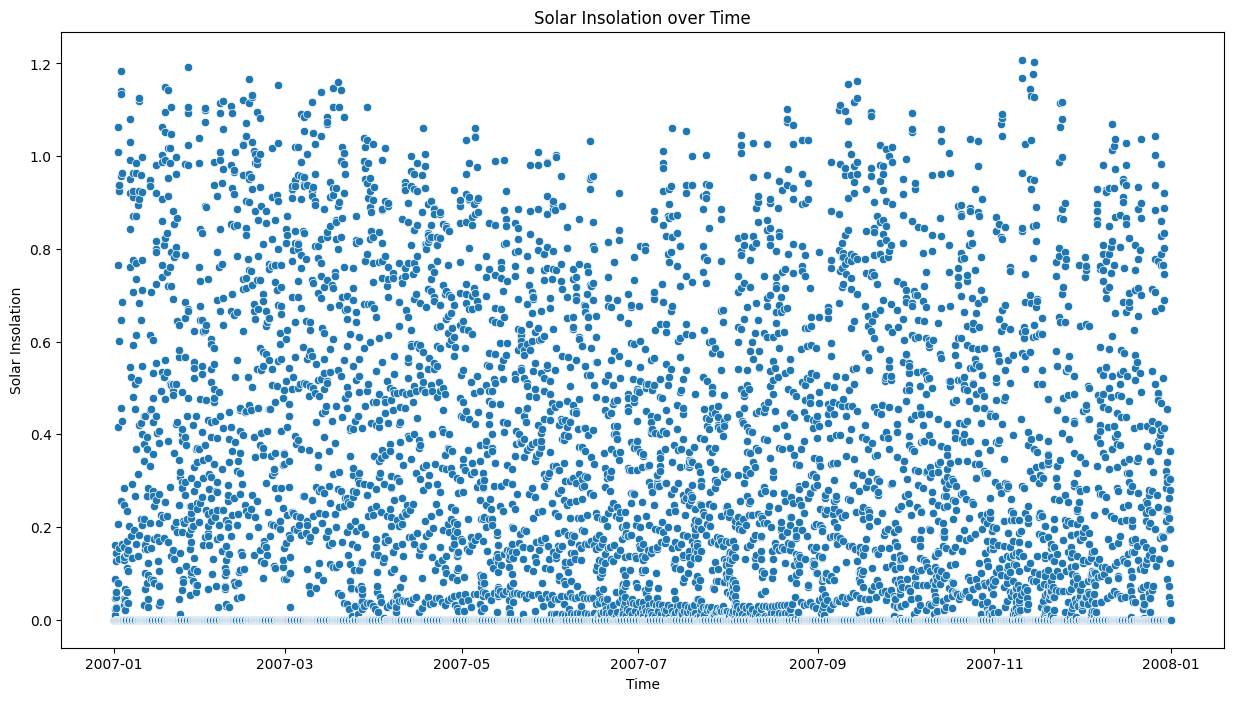

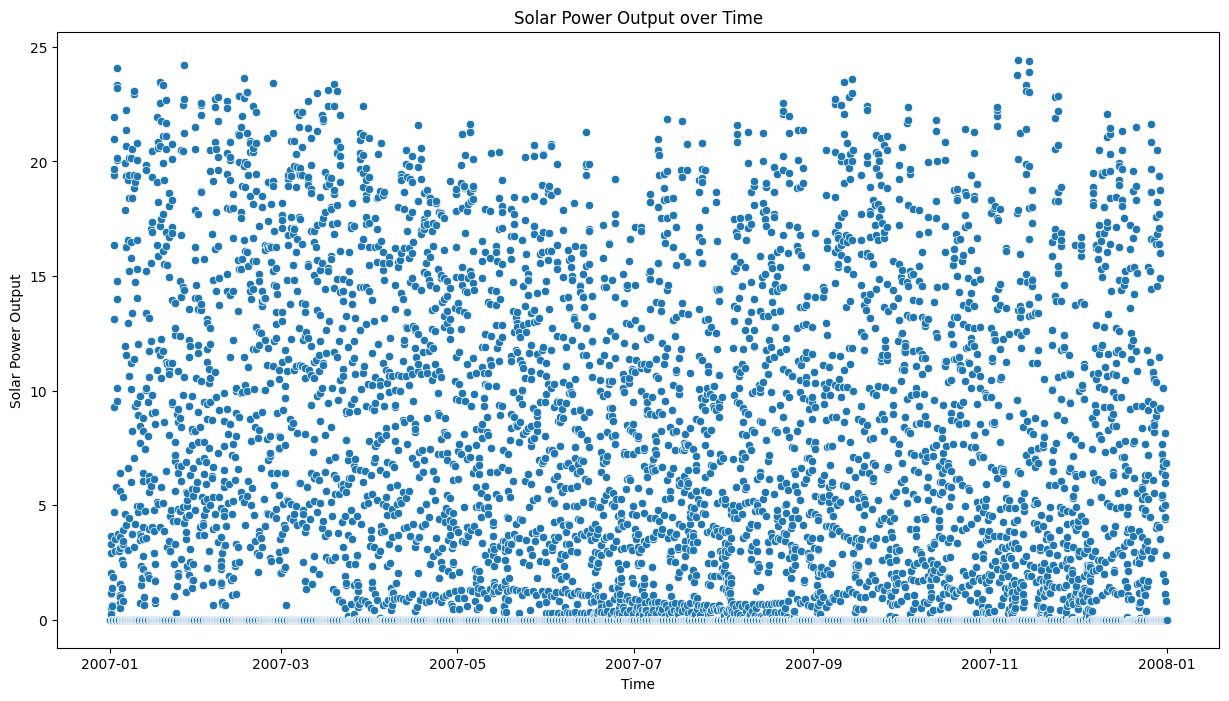

In [145]:
features = ['Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Cell Temperature',
       'Solar Insolation','Solar Power Output']
for feature in features:
    plt.figure(figsize=(15, 8))
    sns.scatterplot(x="Time", y=feature, data=df)
    plt.title(f'{feature} over Time')
    plt.show()

#### *Scatter plot over a Day*

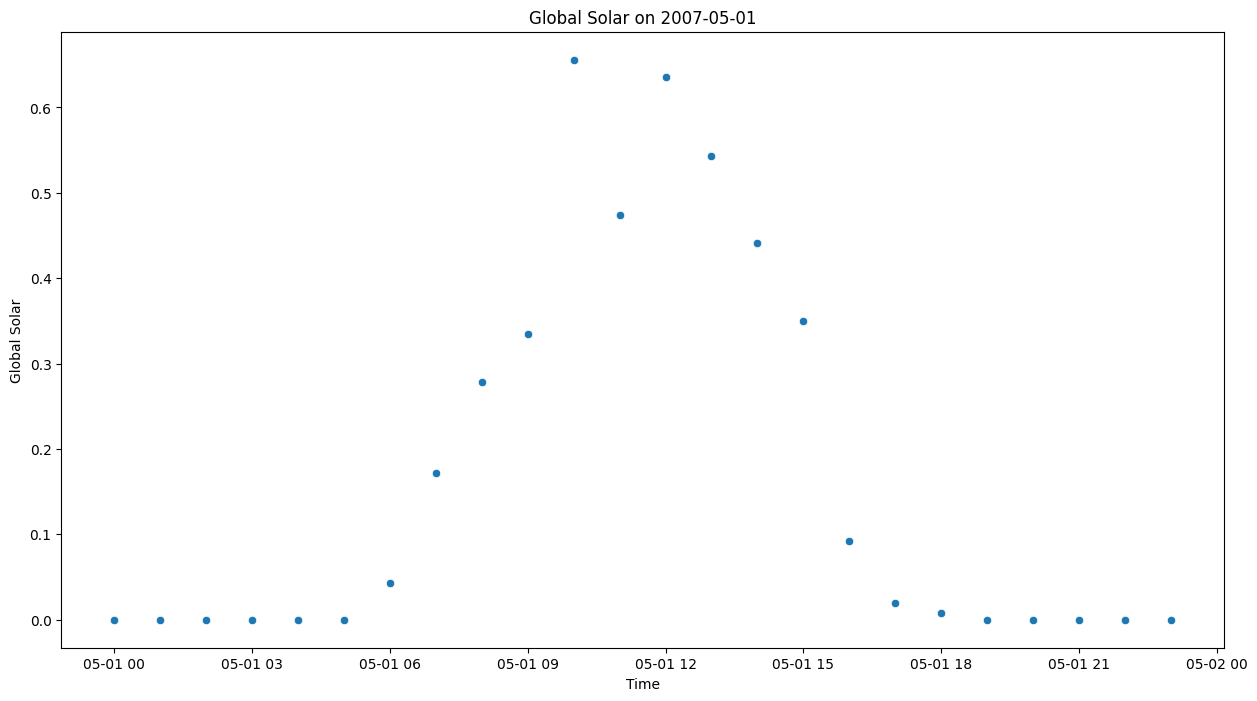

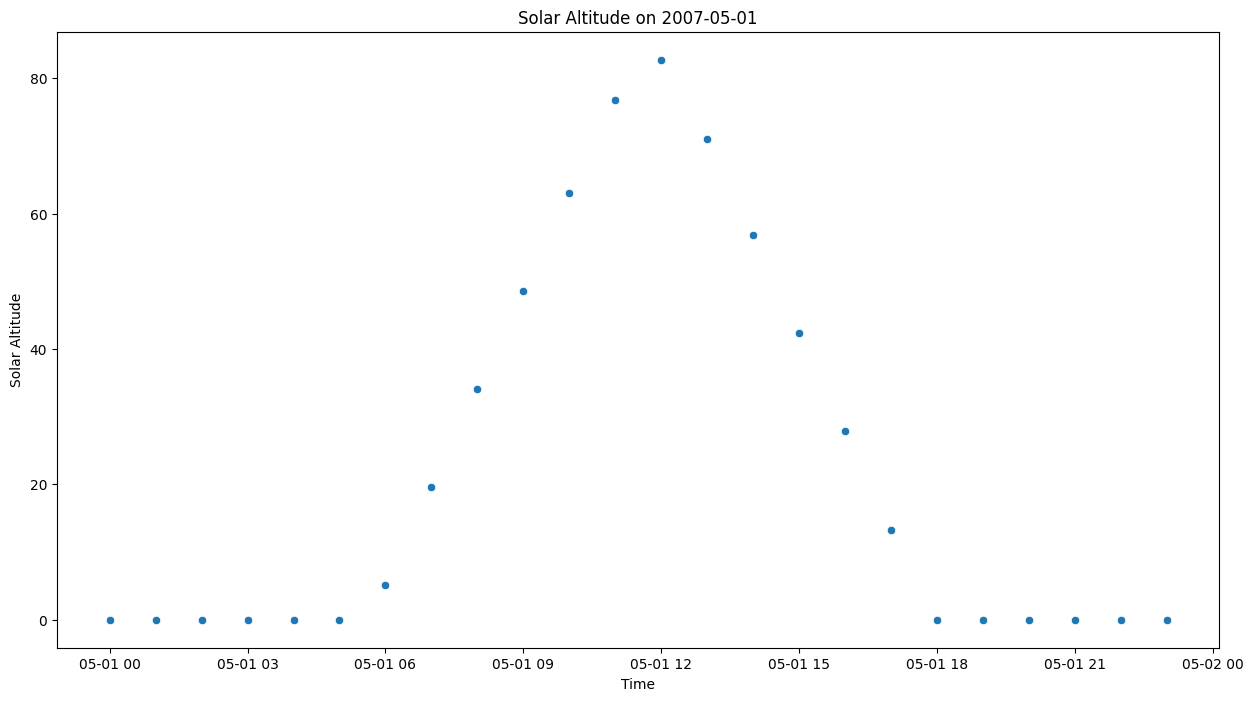

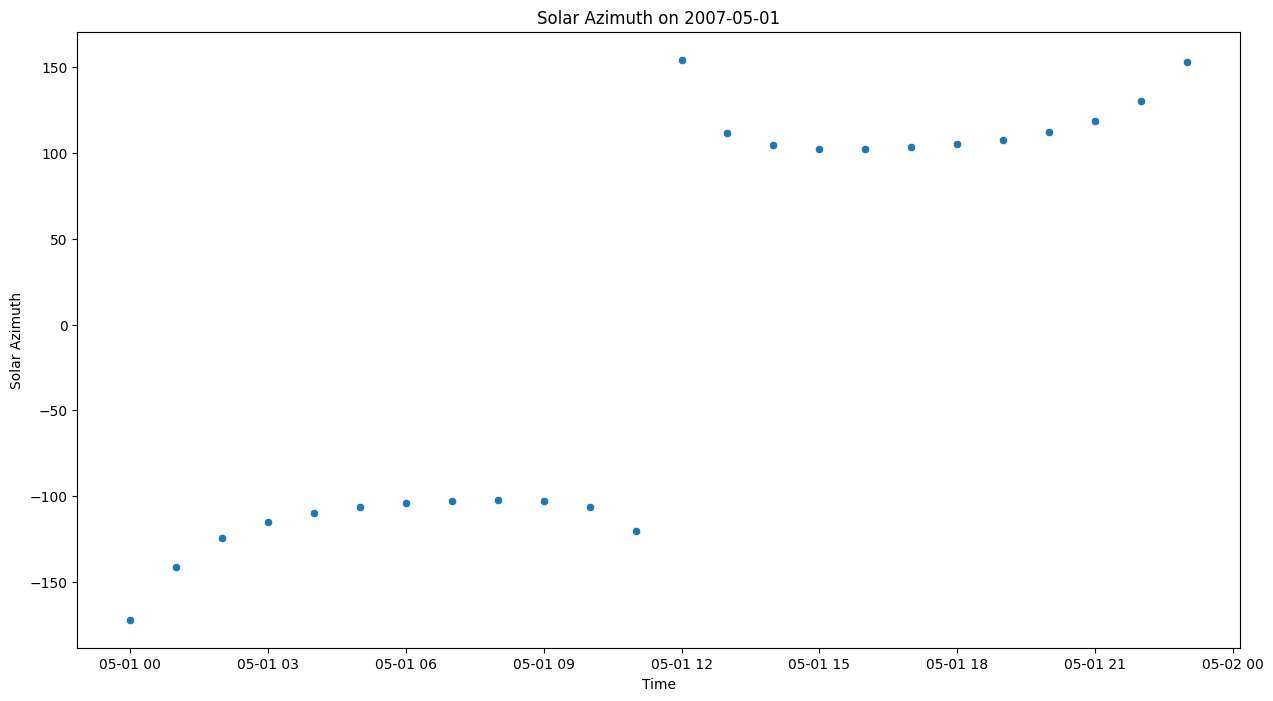

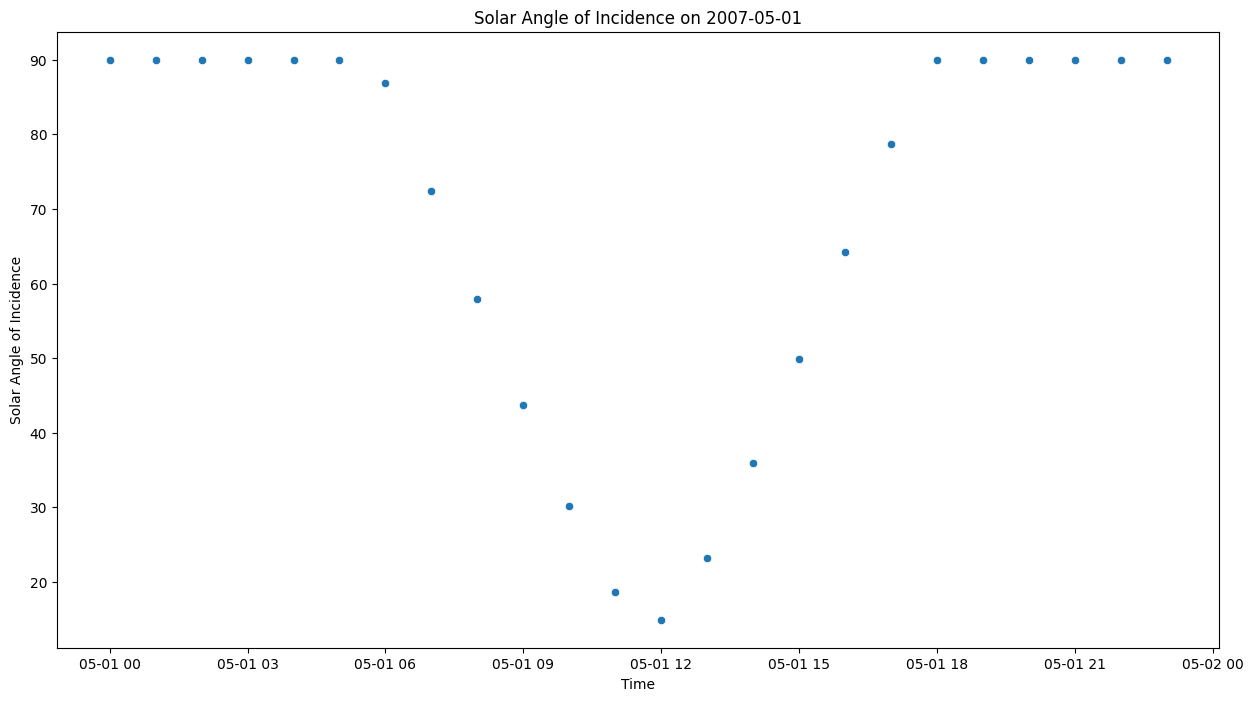

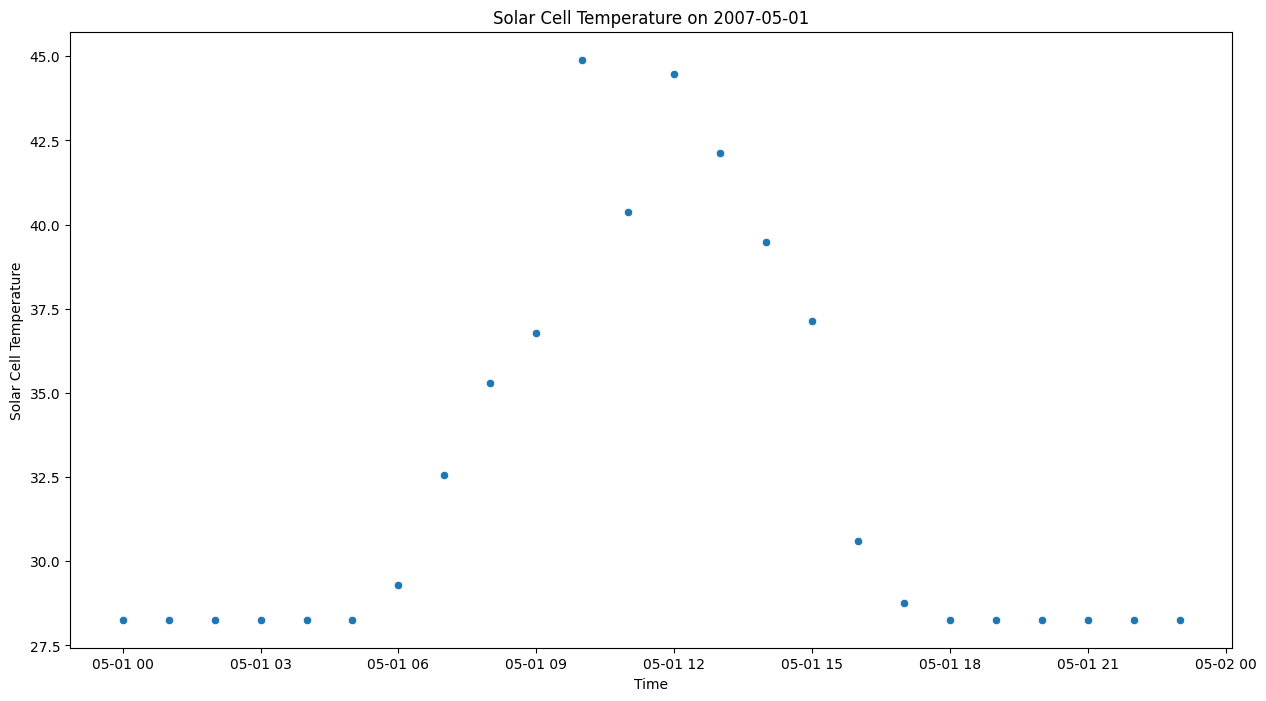

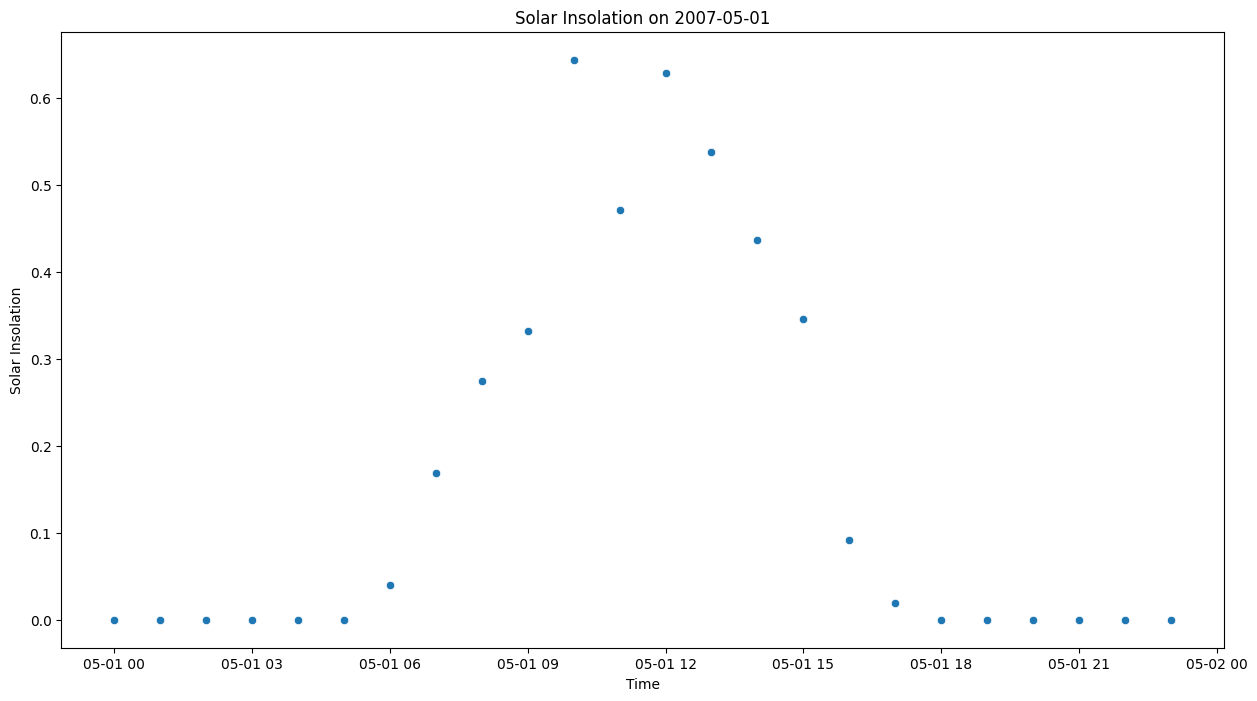

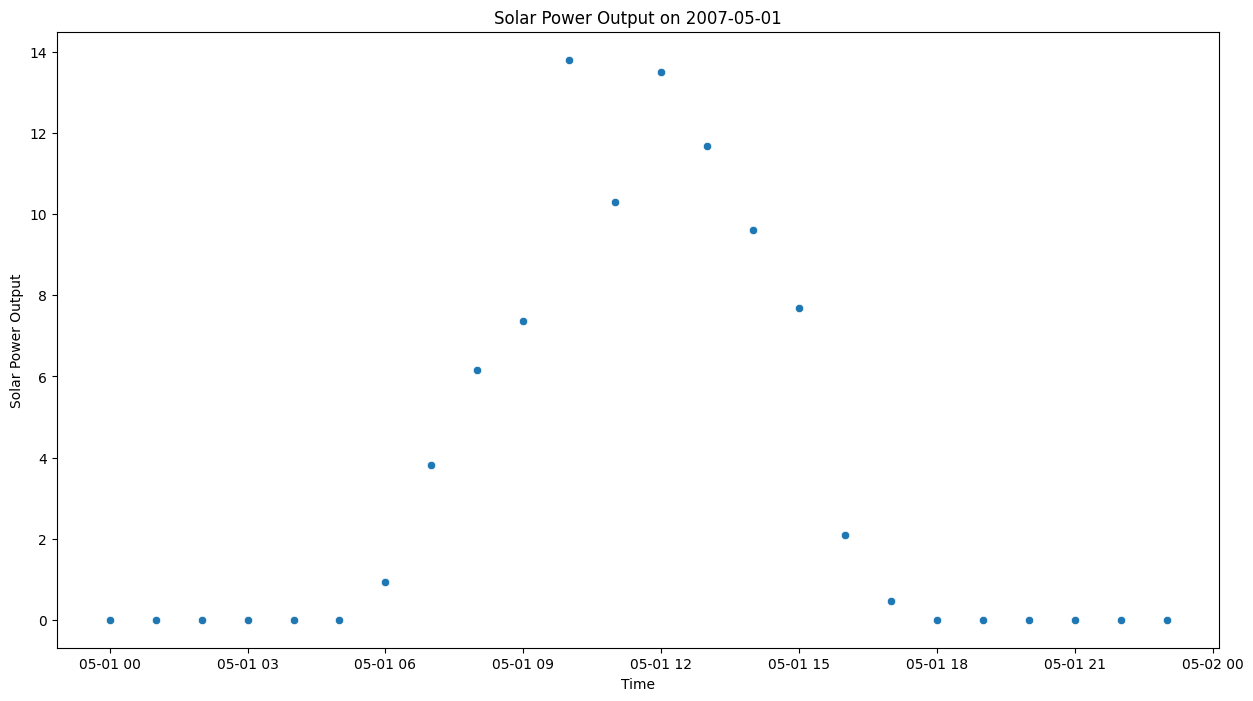

In [146]:
# Assuming 'Time' is your time column and is in datetime format
day_to_plot = '2007-05-01'  # Change this to the day you want to plot

# Filter the DataFrame to include only the specified day
df_day = df[df['Time'].dt.strftime('%Y-%m-%d') == day_to_plot]

features = ['Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Cell Temperature',
       'Solar Insolation','Solar Power Output']

for feature in features:
    plt.figure(figsize=(15, 8))
    sns.scatterplot(x="Time", y=feature, data=df_day)
    plt.title(f'{feature} on {day_to_plot}')
    plt.show()


In [147]:
# copydf = df.copy()
# copydf.loc[copydf['Solar Azimuth'] > 0, 'Solar Azimuth'] += 180
# copydf.loc[copydf['Solar Azimuth'] < 0, 'Solar Azimuth'] += 180

In [148]:
# day_to_plot = '2007-05-01'  # Change this to the day you want to plot

# # Filter the DataFrame to include only the specified day
# df_day = copydf[copydf['Time'].dt.strftime('%Y-%m-%d') == day_to_plot]

# plt.figure(figsize=(15, 8))
# sns.scatterplot(x="Time", y="Solar Azimuth", data=df_day)
# plt.title(f'{feature} on {day_to_plot}')
# plt.show()

#### *Statistics about the Features*

In [149]:
df.describe()

Time  Global Solar  Solar Altitude  Solar Azimuth  \
count                 8760   8760.000000     8760.000000    8760.000000   
mean   2007-07-02 11:30:00      0.204861       20.499226      -0.631746   
min    2007-01-01 00:00:00      0.000000        0.000000    -179.376100   
25%    2007-04-02 05:45:00      0.000000        0.000000     -90.444960   
50%    2007-07-02 11:30:00      0.015372        0.000000      -0.002559   
75%    2007-10-01 17:15:00      0.351834       42.893260      89.596075   
max    2007-12-31 23:00:00      1.158391       87.821980     179.800300   
std                    NaN      0.295512       26.216744      96.711540   

       Solar Angle of Incidence  Solar Cell Temperature  Solar Insolation  \
count               8760.000000             8760.000000       8760.000000   
mean                  69.312000               32.102284          0.206069   
min                    0.645034               25.522780          0.000000   
25%                   47.686585               26.422880          0.000000   
50%                   90.000000               28.323090          0.000000   
75%                   90.000000               35.821810          0.353436   
max                   93.018400               58.686180          1.207991   
std                   26.442984                7.884423          0.299409   

       Solar Power Output  
count         8760.000000  
mean             4.449539  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              7.869895  
max             24.436610  
std              6.333296

#### *Studying Outliers*

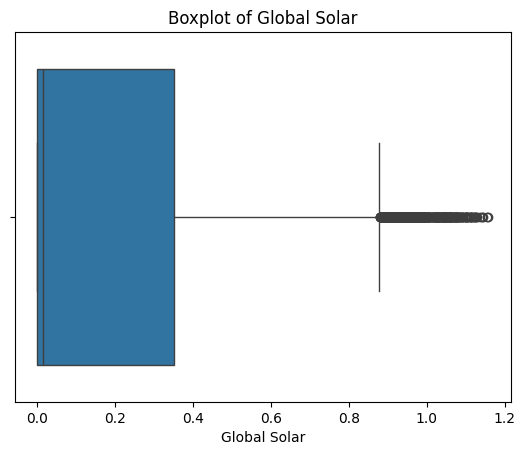

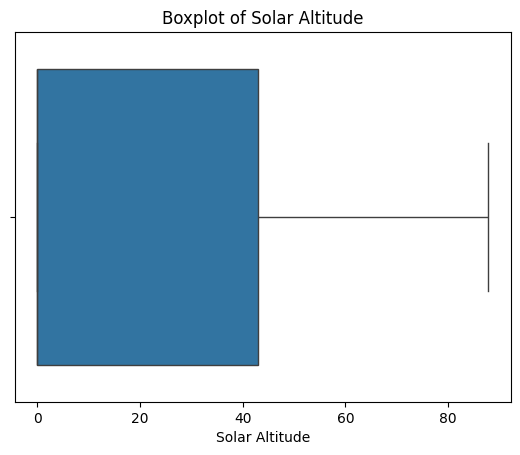

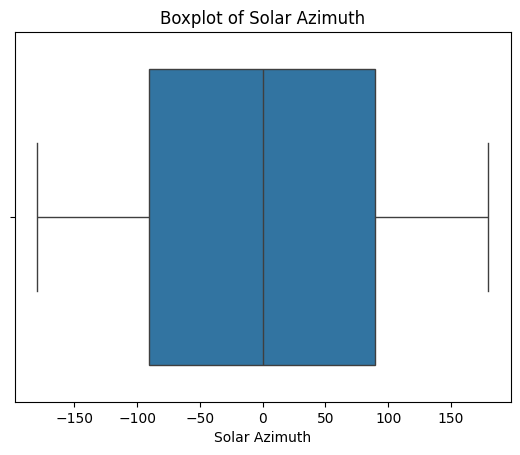

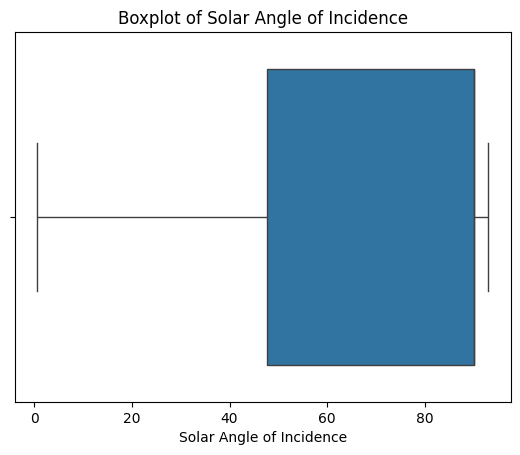

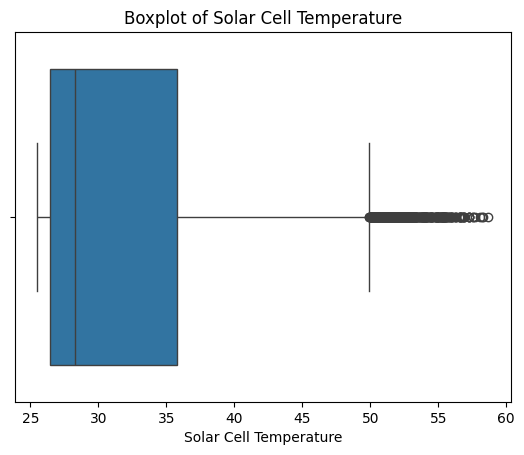

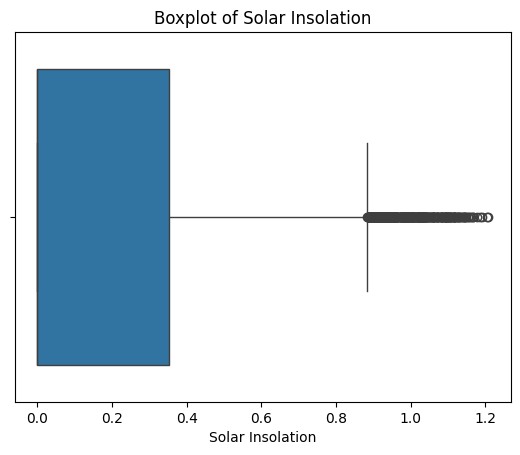

In [150]:
features = ['Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Cell Temperature',
       'Solar Insolation', 'Solar Power Output']

for feature in features:
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


##### *The features has valid outlier which are feasible in the real world and hence we are not removing them from the dataset*


# ***Splitting the Dataset***

In [151]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline


In [152]:
# Assuming 'Time' is your datetime column
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month
df['Day'] = df['Time'].dt.day
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df['Second'] = df['Time'].dt.second

# Now you can drop the original 'Time' column
df = df.drop(columns=['Minute'],axis=1)
df = df.drop(columns=['Second'],axis=1)
df = df.drop(columns=['Time'],axis=1)

In [153]:
df

Global Solar  Solar Altitude  Solar Azimuth  Solar Angle of Incidence  \
0              0.0             0.0       -6.78795                      90.0   
1              0.0             0.0      -45.35176                      90.0   
2              0.0             0.0      -60.21218                      90.0   
3              0.0             0.0      -65.94936                      90.0   
4              0.0             0.0      -68.03603                      90.0   
...            ...             ...            ...                       ...   
8755           0.0             0.0       68.21178                      90.0   
8756           0.0             0.0       67.63509                      90.0   
8757           0.0             0.0       64.81570                      90.0   
8758           0.0             0.0       57.46185                      90.0   
8759           0.0             0.0       38.08067                      90.0   

      Solar Cell Temperature  Solar Insolation  Solar Power Output  Year  \
0                   25.63279               0.0                 0.0  2007   
1                   25.63279               0.0                 0.0  2007   
2                   25.63279               0.0                 0.0  2007   
3                   25.63279               0.0                 0.0  2007   
4                   25.63279               0.0                 0.0  2007   
...                      ...               ...                 ...   ...   
8755                25.52278               0.0                 0.0  2007   
8756                25.52278               0.0                 0.0  2007   
8757                25.52278               0.0                 0.0  2007   
8758                25.52278               0.0                 0.0  2007   
8759                25.52278               0.0                 0.0  2007   

      Month  Day  Hour  
0         1    1     0  
1         1    1     1  
2         1    1     2  
3         1    1     3  
4         1    1     4  
...     ...  ...   ...  
8755     12   31    19  
8756     12   31    20  
8757     12   31    21  
8758     12   31    22  
8759     12   31    23  

[8760 rows x 11 columns]

### Splitting the Data

In [154]:
x = df.drop("Solar Power Output", axis = 1)
y = df[["Solar Power Output", "Month"]]

In [155]:
x[['Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Cell Temperature',
       'Solar Insolation']] = x[['Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Cell Temperature',
       'Solar Insolation']].round(2)
y = y.round(2)

In [156]:
x

Global Solar  Solar Altitude  Solar Azimuth  Solar Angle of Incidence  \
0              0.0             0.0          -6.79                      90.0   
1              0.0             0.0         -45.35                      90.0   
2              0.0             0.0         -60.21                      90.0   
3              0.0             0.0         -65.95                      90.0   
4              0.0             0.0         -68.04                      90.0   
...            ...             ...            ...                       ...   
8755           0.0             0.0          68.21                      90.0   
8756           0.0             0.0          67.64                      90.0   
8757           0.0             0.0          64.82                      90.0   
8758           0.0             0.0          57.46                      90.0   
8759           0.0             0.0          38.08                      90.0   

      Solar Cell Temperature  Solar Insolation  Year  Month  Day  Hour  
0                      25.63               0.0  2007      1    1     0  
1                      25.63               0.0  2007      1    1     1  
2                      25.63               0.0  2007      1    1     2  
3                      25.63               0.0  2007      1    1     3  
4                      25.63               0.0  2007      1    1     4  
...                      ...               ...   ...    ...  ...   ...  
8755                   25.52               0.0  2007     12   31    19  
8756                   25.52               0.0  2007     12   31    20  
8757                   25.52               0.0  2007     12   31    21  
8758                   25.52               0.0  2007     12   31    22  
8759                   25.52               0.0  2007     12   31    23  

[8760 rows x 10 columns]

In [157]:
# # 60% Train - 20% Val - 20% Test
# x_train_or, x_test, y_train_or, y_test = train_test_split(x, y, test_size=0.2)
# x_train, x_val, y_train, y_val = train_test_split(x_train_or, y_train_or, test_size=0.25)

In [158]:
x_train = x[x["Month"] <= 10]
x_val = x[x["Month"]==11]
x_test = x[x["Month"]==12]


In [159]:
x_train

Global Solar  Solar Altitude  Solar Azimuth  Solar Angle of Incidence  \
0              0.0             0.0          -6.79                      90.0   
1              0.0             0.0         -45.35                      90.0   
2              0.0             0.0         -60.21                      90.0   
3              0.0             0.0         -65.95                      90.0   
4              0.0             0.0         -68.04                      90.0   
...            ...             ...            ...                       ...   
7291           0.0             0.0          77.34                      90.0   
7292           0.0             0.0          77.59                      90.0   
7293           0.0             0.0          76.39                      90.0   
7294           0.0             0.0          71.67                      90.0   
7295           0.0             0.0          50.19                      90.0   

      Solar Cell Temperature  Solar Insolation  Year  Month  Day  Hour  
0                      25.63               0.0  2007      1    1     0  
1                      25.63               0.0  2007      1    1     1  
2                      25.63               0.0  2007      1    1     2  
3                      25.63               0.0  2007      1    1     3  
4                      25.63               0.0  2007      1    1     4  
...                      ...               ...   ...    ...  ...   ...  
7291                   26.42               0.0  2007     10   31    19  
7292                   26.42               0.0  2007     10   31    20  
7293                   26.42               0.0  2007     10   31    21  
7294                   26.42               0.0  2007     10   31    22  
7295                   26.42               0.0  2007     10   31    23  

[7296 rows x 10 columns]

In [160]:
y

Solar Power Output  Month
0                    0.0      1
1                    0.0      1
2                    0.0      1
3                    0.0      1
4                    0.0      1
...                  ...    ...
8755                 0.0     12
8756                 0.0     12
8757                 0.0     12
8758                 0.0     12
8759                 0.0     12

[8760 rows x 2 columns]

In [163]:
y_train = y[y["Month"] <= 10]
y_train = y_train.drop("Month", axis=1)


y_val = y[y["Month"] == 11]
y_val = y_val.drop("Month",axis=1)

y_test = y[y["Month"] ==12]
y_test = y_test.drop("Month",axis=1)



In [164]:
y_train

Solar Power Output
0                    0.0
1                    0.0
2                    0.0
3                    0.0
4                    0.0
...                  ...
7291                 0.0
7292                 0.0
7293                 0.0
7294                 0.0
7295                 0.0

[7296 rows x 1 columns]

In [84]:
# y_train = y_train.drop("Month",axis=1)
# y_val = y_val.drop("Month",axis=1)
# y_train = y_test.drop("Month",axis=1)


#### *Defining a Function to Evaluate the Model*

In [165]:
def get_metrics(model):
    train_score = model.score(x_train, y_train)
    val_score = model.score(x_val,y_val)
    mae = mean_absolute_error(y_val,model.predict(x_val))
    mse = mean_squared_error(y_val,model.predict(x_val))
    rmse = np.sqrt(mean_squared_error(y_val,model.predict(x_val)))
    r2 = np.sqrt(r2_score(y_val,model.predict(x_val)))
                              
    print(f'Train score {train_score}')
    print(f'Val score {val_score}')
    print("MAE:" , mae )
    print("MSE:" , mse)
    print("RMSE:" , rmse)
    print("R2:" , r2)
    return val_score,mae
    

# ***Model Training***

### ***Linear Regression***

In [166]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_val_score, lr_mae = get_metrics(lr)

Train score 0.9991599855722183
Val score 0.9988748012699125
MAE: 0.14427008353614745
MSE: 0.03950036158285815
RMSE: 0.19874697880183775
R2: 0.9994372422868344


In [168]:
lr.score(x_test,y_test)

0.9989166438579972

### ***Polynomial Regression***

In [167]:
poly_val_score = []
poly_mae = []
for degree in [1,2,3,4,5]:
    poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly.fit(x_train, y_train)
    print("-"*20)
    print("Degree", degree)
    val_score,mae_value = get_metrics(poly)
    poly_val_score.append(val_score)
    poly_mae.append(mae_value)

--------------------
Degree 1
Train score 0.9991599855722183
Val score 0.9988748012699126
MAE: 0.14427008353615944
MSE: 0.03950036158285655
RMSE: 0.19874697880183376
R2: 0.9994372422868344
--------------------
Degree 2
Train score 0.9999584259799578
Val score 0.9999205688995244
MAE: 0.03286760696156267
MSE: 0.0027884471478813555
RMSE: 0.0528057491934482
R2: 0.9999602836610684
--------------------
Degree 3
Train score 0.9999768774443974
Val score 0.9989260362492135
MAE: 0.17491041816751782
MSE: 0.03770174578818519
RMSE: 0.19416937397072997
R2: 0.9994628738723682
--------------------
Degree 4
Train score 0.999997724777553
Val score 0.9055148525379528
MAE: 1.530648222176565
MSE: 3.316922948064781
RMSE: 1.8212421442698883
R2: 0.9515854415332092
--------------------
Degree 5
Train score 0.9999997184472551
Val score 0.9419144375579611
MAE: 1.3194505332107398
MSE: 2.039107099797228
RMSE: 1.4279730739048366
R2: 0.9705227650900112


### ***Lasso Regression***

In [156]:
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)
lasso_val_score, lasso_mae = get_metrics(lasso_model)

Train score 0.9817445892626586
Val score 0.9825575467630223
MAE: 0.6831613021089857
MSE: 0.7293300955603135
RMSE: 0.8540082526300982
R2: 0.9912404081568822


### ***Ridge Regression***

In [157]:
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)
ridge_val_score,ridge_mae = get_metrics(ridge_model)

Train score 0.9988878543334427
Val score 0.9988987220973568
MAE: 0.1451496193483581
MSE: 0.04604828845236871
RMSE: 0.2145886494024526
R2: 0.9994492093635158


### ***Elastic Net Model***

In [158]:
EN_model = ElasticNet(alpha=1)
EN_model.fit(x_train, y_train)
en_val_score,en_mae = get_metrics(EN_model)

Train score 0.9837312401217498
Val score 0.9844424049376755
MAE: 0.6284614247232836
MSE: 0.6505175699390199
RMSE: 0.8065466942087234
R2: 0.9921907099633999


### ***Random Forest Regression***

In [159]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_val_score,rf_mae = get_metrics(rf)

Train score 0.9999903150508082
Val score 0.9999265294302773
MAE: 0.03048613013698639
MSE: 0.0030720619920091424
RMSE: 0.05542618507536977
R2: 0.9999632640403733


### ***Decision Tree Regression***

In [160]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_val_score,dt_mae = get_metrics(dt)

Train score 1.0
Val score 0.9998906470153597
MAE: 0.03709474885844749
MSE: 0.004572431506849319
RMSE: 0.06761975677898671
R2: 0.9999453220128387


### ***eXtreme Gradient Boosting Regression***

In [161]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
xgb_val_score,xgb_mae = get_metrics(xgb)

Train score 0.9999902057789676
Val score 0.999930185755075
MAE: 0.031090786479910683
MSE: 0.002919178238914603
RMSE: 0.0540294201238048
R2: 0.9999650922682626


In [162]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1752 entries, 4254 to 471
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Global Solar              1752 non-null   float64
 1   Solar Altitude            1752 non-null   float64
 2   Solar Azimuth             1752 non-null   float64
 3   Solar Angle of Incidence  1752 non-null   float64
 4   Solar Cell Temperature    1752 non-null   float64
 5   Solar Insolation          1752 non-null   float64
 6   Year                      1752 non-null   int32  
 7   Month                     1752 non-null   int32  
 8   Day                       1752 non-null   int32  
 9   Hour                      1752 non-null   int32  
dtypes: float64(6), int32(4)
memory usage: 123.2 KB


In [163]:
y_test

4254     0.54
8043     0.00
6328     6.20
3979     0.00
2839     1.97
        ...  
1934    10.95
4985     1.93
516     16.86
5073     3.90
471     15.50
Name: Solar Power Output, Length: 1752, dtype: float64

In [164]:
#     'Model': ['Linear Regression', 'Polynomial Regression', 'Lasso Regression', 'Ridge Regression','Elastic Net Model','Random Forest Regression', 'Decision Tree Regression', 'XGB Regression'],


Text(0, 0.5, 'Accuracy')

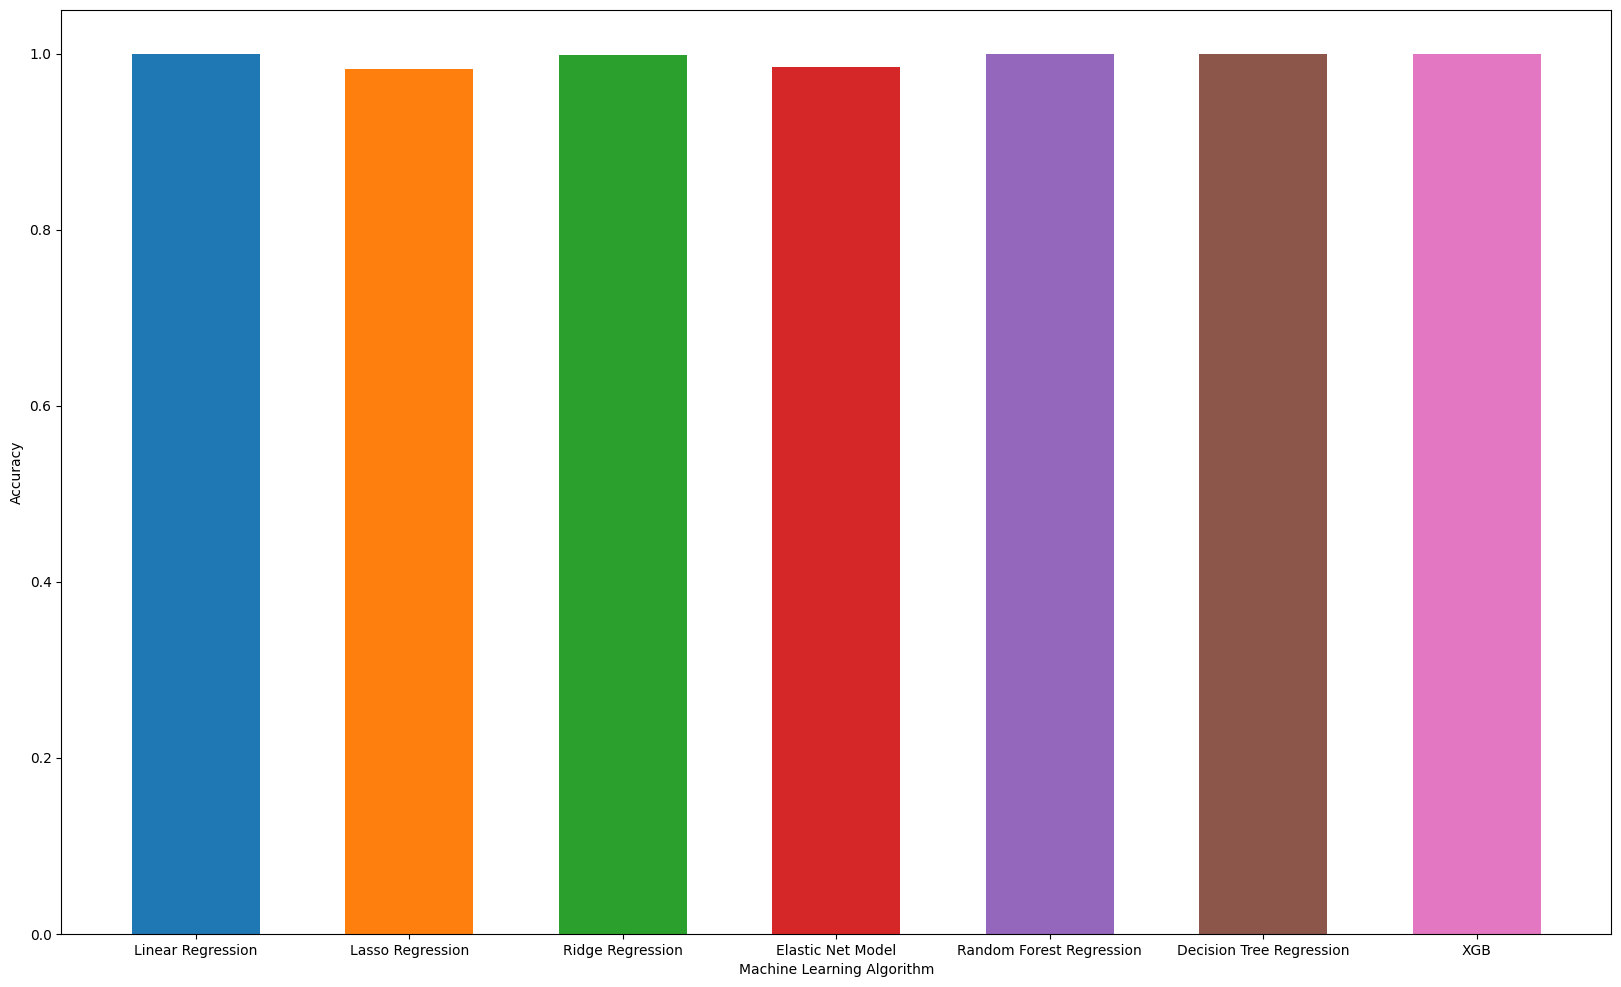

In [165]:
plt.figure(figsize=(20, 12))
plt.bar("Linear Regression",lr_val_score,width=0.6)
plt.bar("Lasso Regression",lasso_val_score,width=0.6)
plt.bar("Ridge Regression",ridge_val_score,width=0.6)
plt.bar("Elastic Net Model",en_val_score,width=0.6)
plt.bar("Random Forest Regression",rf_val_score,width=0.6)
plt.bar("Decision Tree Regression",dt_val_score,width=0.6)
plt.bar("XGB",xgb_val_score,width=0.6)

plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Accuracy")

 'Polynomial Regression D1', 'Polynomial Regression D2', 'Polynomial Regression D3', 'Polynomial Regression D4', 'Polynomial Regression D5',
 100*round(poly_val_score[0],4), 100*round(poly_val_score[1],4), 100*round(poly_val_score[2],4), 100*round(poly_val_score[3],4), 100*round(poly_val_score[4],4),

In [166]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression','Elastic Net Model','Random Forest Regression', 'Decision Tree Regression', 'XGB Regression'],
    'Score': [100*lr_val_score.round(4), 100*round(lasso_val_score,4), 100*round(ridge_val_score,4), 100*round(en_val_score,4), 
              100*rf_val_score.round(4), 100*round(dt_val_score,4), 100*round(xgb_val_score,4)],
    'MAE': [lr_mae.round(4),lasso_mae.round(4),ridge_mae.round(4),en_mae.round(4),rf_mae.round(4),dt_mae.round(4),xgb_mae.round(4)]
})
models.sort_values(by = 'Score', ascending = False)

Model  Score     MAE
4  Random Forest Regression  99.99  0.0305
5  Decision Tree Regression  99.99  0.0371
6            XGB Regression  99.99  0.0311
0         Linear Regression  99.92  0.1315
2          Ridge Regression  99.89  0.1451
3         Elastic Net Model  98.44  0.6285
1          Lasso Regression  98.26  0.6832

# ***Model Saving***

In [167]:
import pickle

with open("solar_rf.pkl","wb") as file:
    pickle.dump(rf, file)

# ***Prediction***

In [57]:
global_solar_incidence = float(input("Enter Global Solar Incidence: "))
solar_altitude = float(input("Enter Solar Altitude: "))
solar_azimuth_angle = float(input("Enter Solar Azimuth Angle: "))
solar_angle_of_incidence = float(input("Enter Solar Angle of Incidence: "))
solar_cell_temp = float(input("Enter Solar Cell Temperature: "))
solar_insolation = float(input("Enter Solar Insolation: "))
year = float(input("Enter Year: "))
month = float(input("Enter Month: "))
day = float(input("Enter Day: "))
hour = float(input("Enter Hour: "))


input_data = (global_solar_incidence, solar_altitude, solar_azimuth_angle, solar_angle_of_incidence, solar_cell_temp, solar_insolation, year, month, day, hour)

feature_names = ['Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Cell Temperature',
       'Solar Insolation', 'Year', 'Month', 'Day', 'Hour']

with open("soalr_rf.pkl","rb") as file:
       solar_model = pickle.load(file)

input_df = pd.DataFrame([input_data],columns=feature_names)
predicted_solar_power = solar_model.predict(input_df)

print('Predicted Solar Power Output:', predicted_solar_power)


ValueError: could not convert string to float: ''

RF MAE - 0.0306

In [168]:
x_test

Global Solar  Solar Altitude  Solar Azimuth  Solar Angle of Incidence  \
4254          0.02            4.96        -112.95                     88.23   
8043          0.00            0.00         -67.89                     90.00   
6328          0.27           25.59          86.33                     64.16   
3979          0.00            0.00         116.16                     90.00   
2839          0.09           19.49        -102.00                     72.38   
...            ...             ...            ...                       ...   
1934          0.50           58.37          75.87                     30.57   
4985          0.08           15.92         107.94                     76.71   
516           0.75           61.78          -0.23                     20.13   
5073          0.17           45.96        -108.20                     47.06   
471           0.66           37.29          56.39                     48.57   

      Solar Cell Temperature  Solar Insolation  Year  Month  Day  Hour  
4254                   27.40              0.02  2007      6   27     6  
8043                   25.52              0.00  2007     12    2     3  
6328                   33.54              0.28  2007      9   21    16  
3979                   26.80              0.00  2007      6   15    19  
2839                   31.02              0.09  2007      4   29     7  
...                      ...               ...   ...    ...  ...   ...  
1934                   41.26              0.50  2007      3   22    14  
4985                   28.24              0.08  2007      7   27    17  
516                    46.06              0.79  2007      1   22    12  
5073                   30.47              0.17  2007      7   31     9  
471                    44.23              0.72  2007      1   20    15  

[1752 rows x 10 columns]

In [169]:
y_test

4254     0.54
8043     0.00
6328     6.20
3979     0.00
2839     1.97
        ...  
1934    10.95
4985     1.93
516     16.86
5073     3.90
471     15.50
Name: Solar Power Output, Length: 1752, dtype: float64

In [170]:
input_data = (0.02,	4.96	,-112.95,	88.23,	27.40,	0.02,	2007,	6	,27,	6)

feature_names = ['Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Cell Temperature',
       'Solar Insolation', 'Year', 'Month', 'Day', 'Hour']

input_df = pd.DataFrame([input_data],columns=feature_names)
prediction = rf.predict(input_df)
print(prediction)

print('Predicted load forecast : ', prediction)

[0.4937]
Predicted load forecast :  [0.4937]
